### Life Expectancy Prediction Assessment

***Our Team has been given the task to predict the life expectancy of a country's population based on various socio-economic and health-related factors.***

***We will look into the dataset and perform the following analysis in this notebook:***

***1. Importing the necessary libraries***

***2. Data exploration and preprocessing***

***3. Feature engineering and selection.***

***4. Model training, evaluation, and interpretation.***

***5. Making predictions and validating model performance.***

**Import Libraries and Warnings**

In [1]:
# First, we will Import warnings to keep the notebook output clean
import warnings
warnings.filterwarnings('ignore')

# Import Libraries
# %matplotlib inline ensures that plots are displayed within the notebook
%matplotlib inline 
import matplotlib.pyplot as plt # We will use this to create visualizations.
import seaborn as sns # We will use this for statistical data visualizations.
import pandas as pd # This will be used for data manipulation and analysis.
import numpy as np # Lastly, this will be used for numerical computations.

**Data Exploration and Preprocessing**

**Exploratory Data Analysis (EDA)**

In [2]:
# Next, we will load the dataset
df = pd.read_csv('./data/Life Expectancy Dataset.csv')

In [3]:
# Then, we will check the first few rows of the dataset.
# This will help us to quickly understand the data structure, column names and the values.

df.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32         97.0       65  27.8  ...   
1          57.9025                10.35         97.0       94  26.0  ...   
2         201.0765                 1.57         60.0       35  21.2  ...   
3         222.1965                 5.68         93.0       74  25.3  ...   
4          57.9510                 2.89         97.0       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08         11006.0           78.53   
1          97           0.09         25742.0           46.44   
2          64           0.13          1076.0         1183.21   
3          93           0.79          4146.0            0.75   
4          94           0.08         33995.0            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

In [4]:
# Here, we will check the last few rows of the dataset
# This is to spot any irregularities or missing values at the end of the dataset.

df.tail()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
2859      Niger          Africa  2000           97.0              224.9   
2860   Mongolia            Asia  2009           23.9               28.6   
2861  Sri Lanka            Asia  2004           17.7               28.9   
2862  Lithuania  European Union  2002            7.9                9.9   
2863    Iceland  Rest of Europe  2011            2.1                2.6   

      Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
2859         291.8240                0.092         72.0       64  20.8  ...   
2860         235.2330                6.560         97.0       97  25.3  ...   
2861         134.8950                1.560         62.0       95  21.9  ...   
2862         204.0120               11.000         94.0       95  26.1  ...   
2863          50.5745                6.840         88.0       90  26.1  ...   

      Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
2859          34           0.49           399.0           11.33   
2860          95           0.02          2515.0            2.67   
2861          97           0.02          2130.0           19.39   
2862          95           0.05          7424.0            3.44   
2863          95           0.05         48934.0            0.32   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
2859                         12.8                      12.9        1.1   
2860                          2.2                       2.3        9.1   
2861                         15.4                      15.5       10.3   
2862                          3.3                       3.3       11.1   
2863                          0.9                       0.9       11.0   

      Economy_status_Developed  Economy_status_Developing  Life_expectancy  
2859                         0                          1             49.9  
2860                         0                          1             66.9  
2861                         0                          1             74.3  
2862                         1                          0             71.8  
2863                         1                          0             82.4  

[5 rows x 21 columns]

In [ ]:
# Now, we will check the Data Shape
# This will give us detailed information of the number of rows and columns.

df.shape

(2864, 21)

In [ ]:
# We will check the basic information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2859 non-null   float64
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2861 non-null   float64
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
# Now, we will Check for missing values in the dataset
# This will help us identify columns with incomplete data that may need cleaning.

print("Missing Values Before Cleaning:")
print(df.isnull().sum())

Missing Values Before Cleaning:
Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    5
Measles                        0
BMI                            0
Polio                          3
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 5
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64


In [ ]:
# Here we will check Duplicate Values in the dataset.
# This will help to prevent bias in our analysis and model training.

print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
# We will identify garbage value here.
# This will help remove invalid or meaningless data entries that doesn't belong to the dataset. 
# Which can skew our analysis or model.

for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Country
Turkiye            16
Slovak Republic    16
Latvia             16
Angola             16
Jamaica            16
                   ..
Kuwait             16
Argentina          16
Panama             16
Oman               16
Georgia            16
Name: count, Length: 179, dtype: int64
******************************
Region
Africa                           816
European Union                   432
Asia                             432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: count, dtype: int64
******************************


In [10]:
# Now, we will check the Descriptive Statistics of the dataset.
# This will provide a summary statistics for the numerical columns.
# Transpose will also help to easily read the statistics as rows and columns.

df.describe().T

count          mean           std       min  \
Year                         2864.0   2007.500000      4.610577  2000.000   
Infant_deaths                2864.0     30.363792     27.538117     1.800   
Under_five_deaths            2864.0     42.938268     44.569974     2.300   
Adult_mortality              2864.0    192.251775    114.910281    49.384   
Alcohol_consumption          2864.0      4.820882      3.981949     0.000   
Hepatitis_B                  2859.0     84.286464     15.999020    12.000   
Measles                      2864.0     77.344972     18.659693    10.000   
BMI                          2864.0     25.032926      2.193905    19.800   
Polio                        2861.0     86.514156     15.069868     8.000   
Diphtheria                   2864.0     86.271648     15.534225    16.000   
Incidents_HIV                2864.0      0.894288      2.381389     0.010   
GDP_per_capita               2859.0  11540.459951  16946.533746   148.000   
Population_mln               2864.0     36.675915    136.485867     0.080   
Thinness_ten_nineteen_years  2864.0      4.865852      4.438234     0.100   
Thinness_five_nine_years     2864.0      4.899825      4.525217     0.100   
Schooling                    2864.0      7.632123      3.171556     1.100   
Economy_status_Developed     2864.0      0.206704      0.405012     0.000   
Economy_status_Developing    2864.0      0.793296      0.405012     0.000   
Life_expectancy              2864.0     68.856075      9.405608    39.400   

                                    25%        50%           75%          max  
Year                         2003.75000  2007.5000   2011.250000    2015.0000  
Infant_deaths                   8.10000    19.6000     47.350000     138.1000  
Under_five_deaths               9.67500    23.1000     66.000000     224.9000  
Adult_mortality               106.91025   163.8415    246.791375     719.3605  
Alcohol_consumption             1.20000     4.0200      7.777500      17.8700  
Hepatitis_B                    78.00000    89.0000     96.000000      99.0000  
Measles                        64.00000    83.0000     93.000000      99.0000  
BMI                            23.20000    25.5000     26.400000      32.1000  
Polio                          81.00000    93.0000     97.000000      99.0000  
Diphtheria                     81.00000    93.0000     97.000000      99.0000  
Incidents_HIV                   0.08000     0.1500      0.460000      21.6800  
GDP_per_capita               1412.50000  4216.0000  12477.000000  112418.0000  
Population_mln                  2.09750     7.8500     23.687500    1379.8600  
Thinness_ten_nineteen_years     1.60000     3.3000      7.200000      27.7000  
Thinness_five_nine_years        1.60000     3.4000      7.300000      28.6000  
Schooling                       5.10000     7.8000     10.300000      14.1000  
Economy_status_Developed        0.00000     0.0000      0.000000       1.0000  
Economy_status_Developing       1.00000     1.0000      1.000000       1.0000  
Life_expectancy                62.70000    71.4000     75.400000      83.8000

In [ ]:
# Here , we will perform descriptive statistics on the categorical data columns.

df.describe(include="object")

Country  Region
count      2864    2864
unique      179       9
top     Turkiye  Africa
freq         16     816

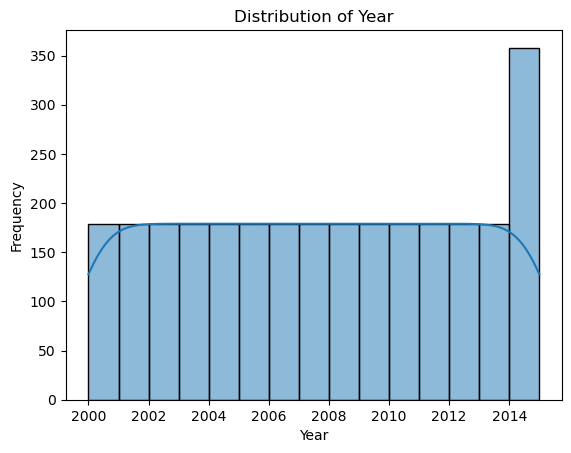

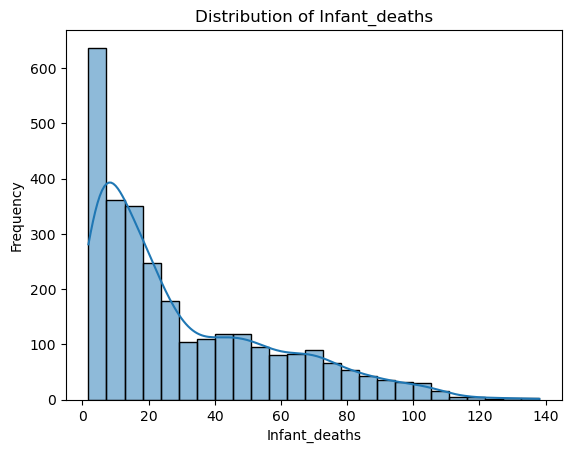

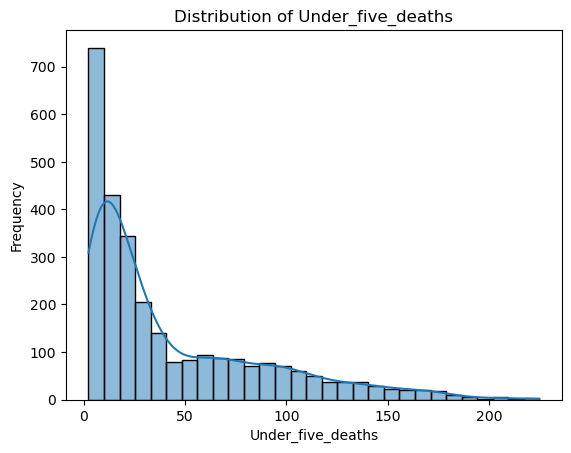

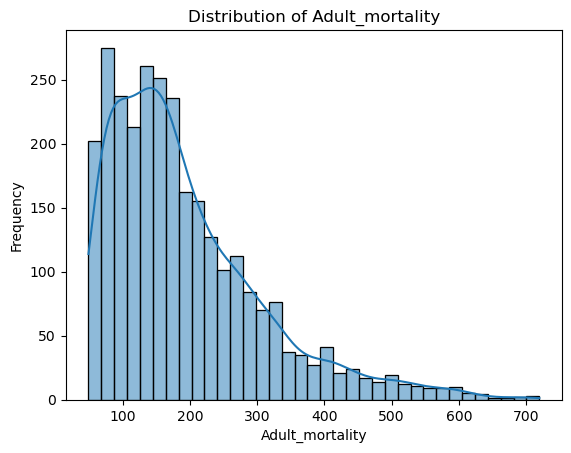

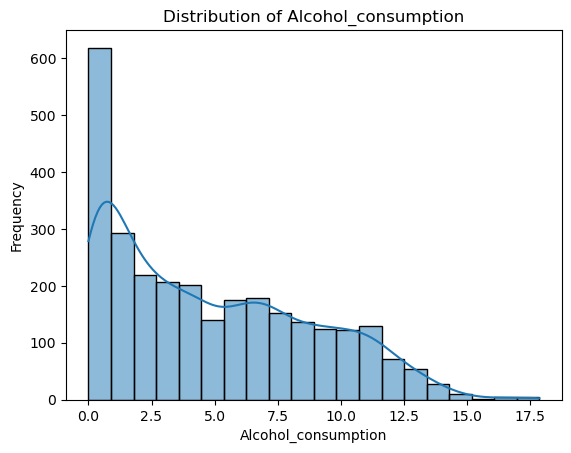

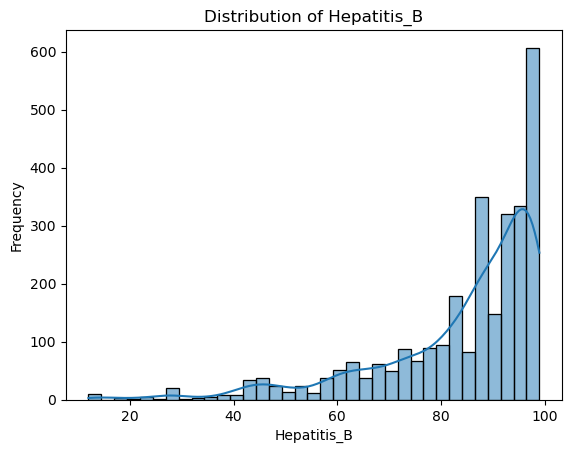

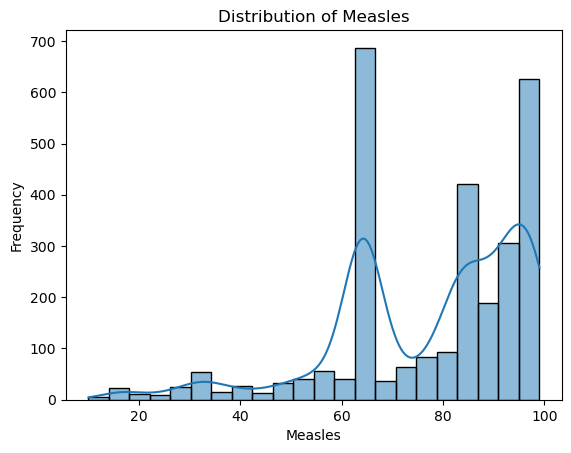

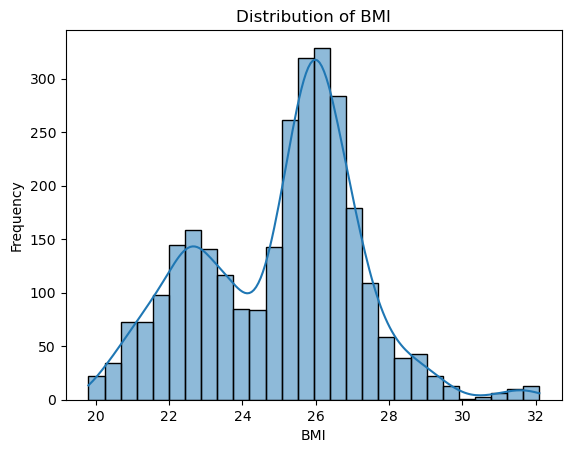

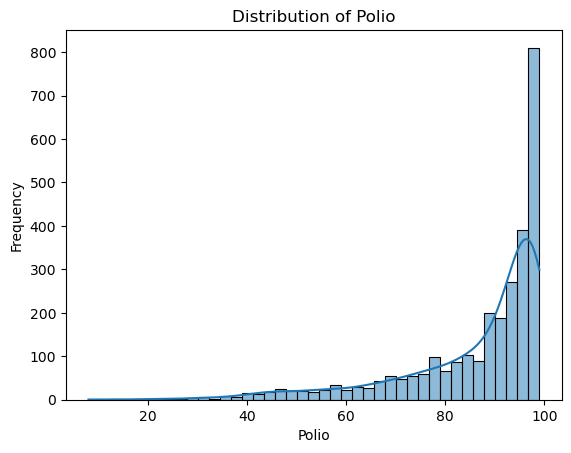

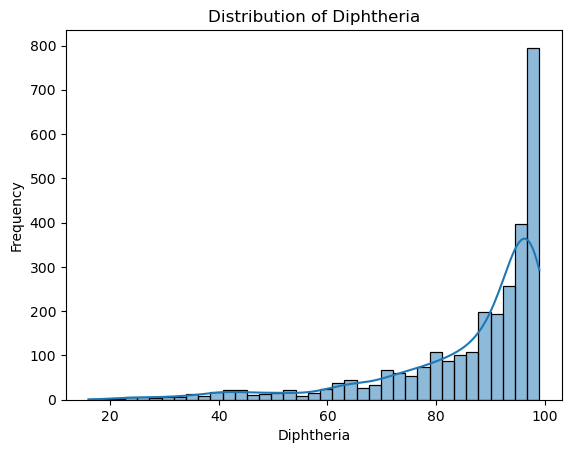

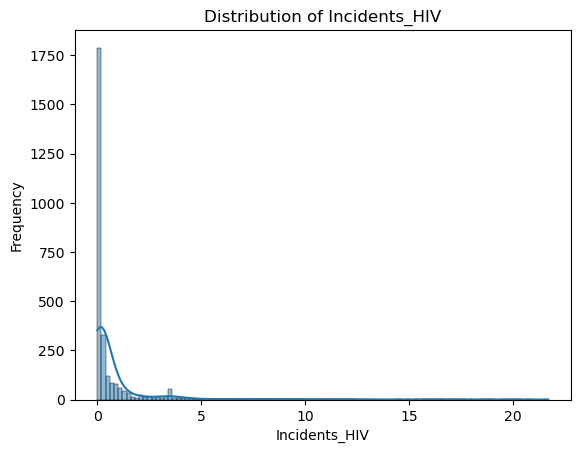

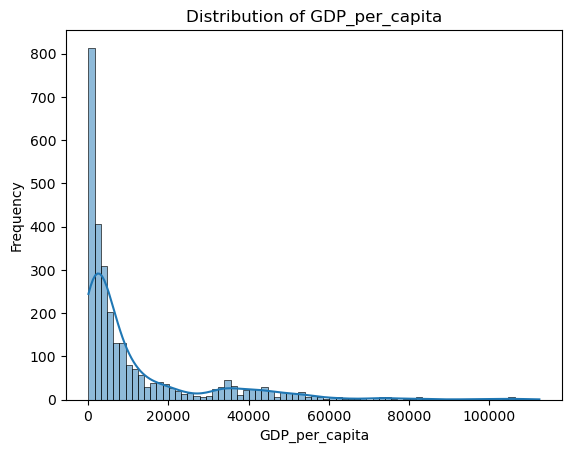

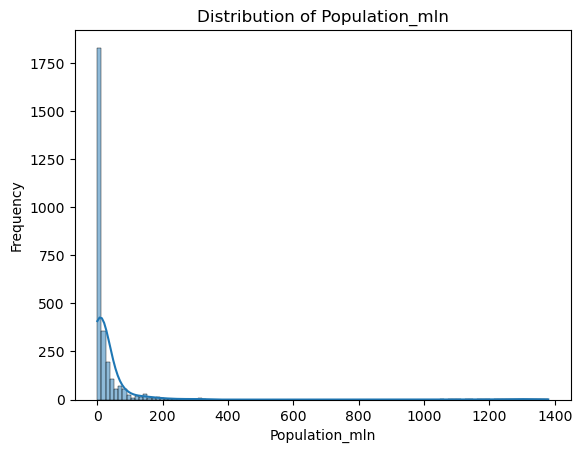

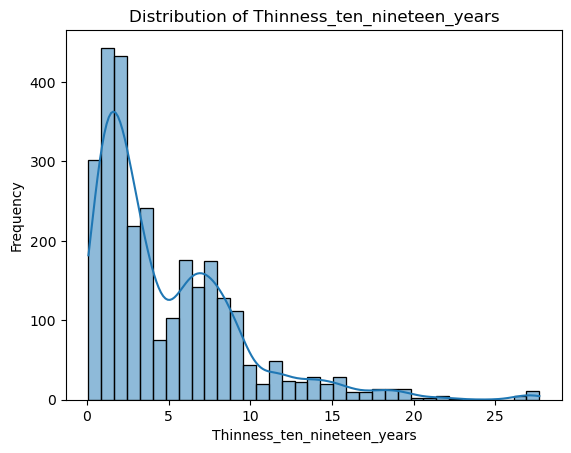

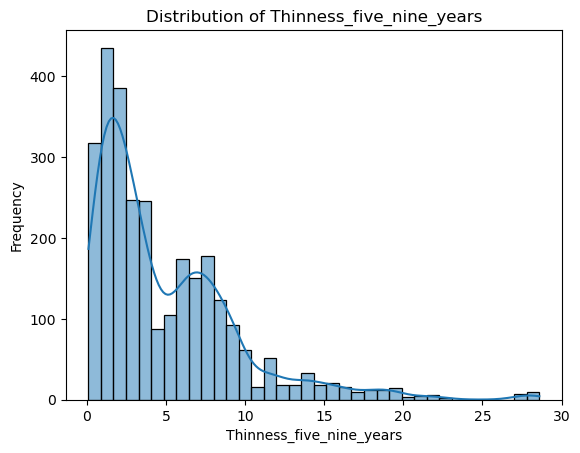

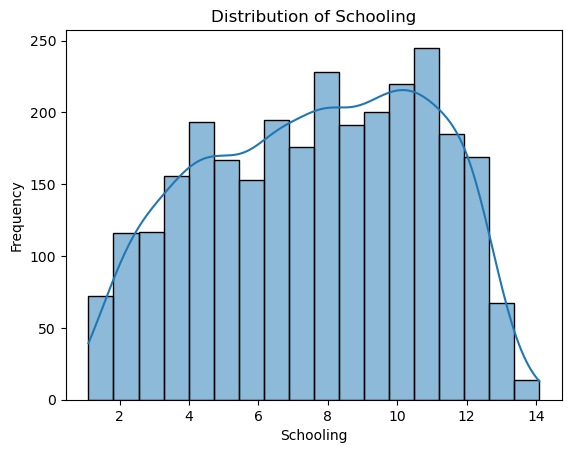

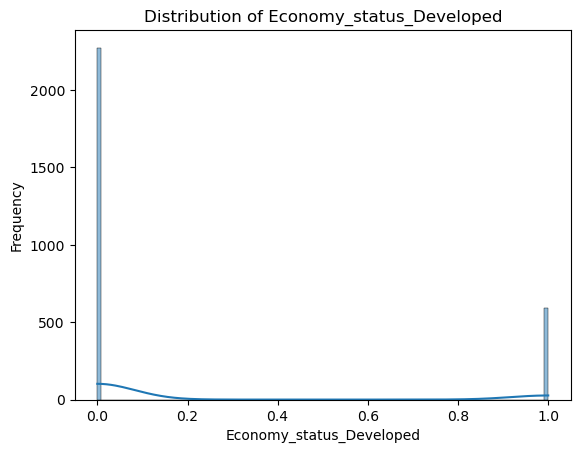

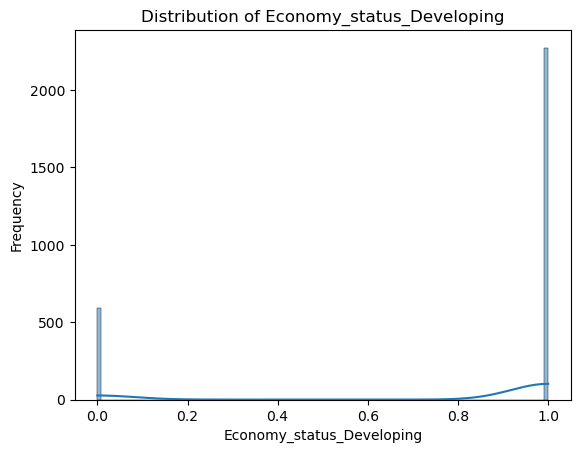

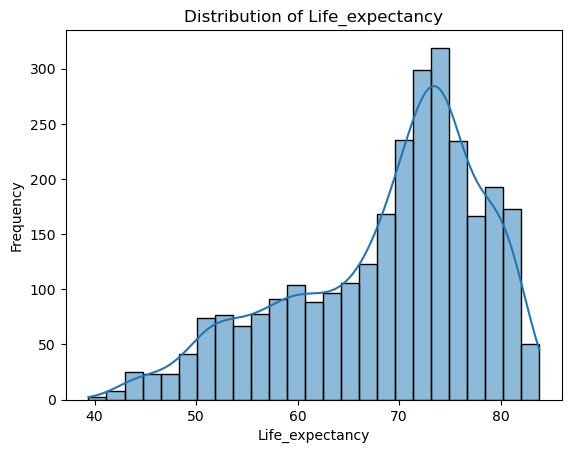

In [13]:
# Now, we will Plot an histogram to understand the data distribution of the numerical datatypes.
# This will identify skewness, outliers, and patterns in the dataset.

for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i, kde=True) #This will add a smooth curve for better visualiazation.
    plt.title(f'Distribution of {i}') 
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

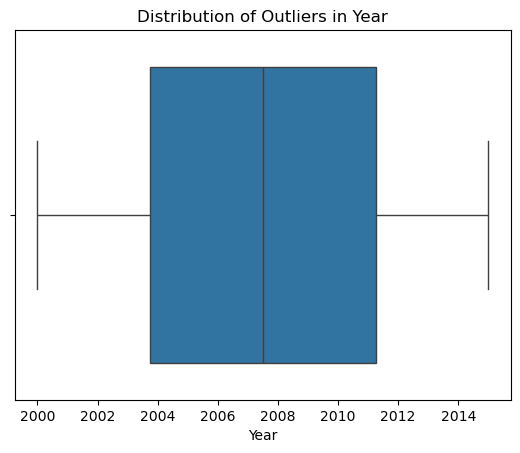

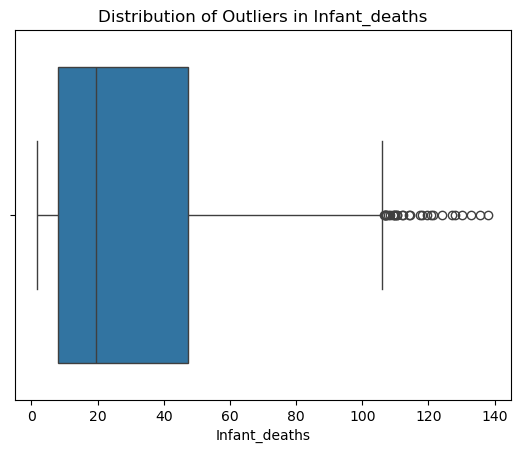

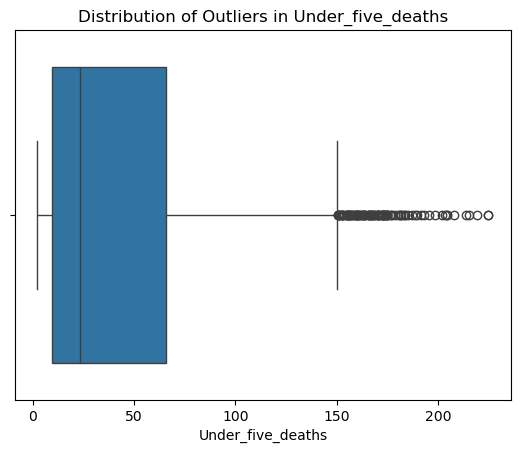

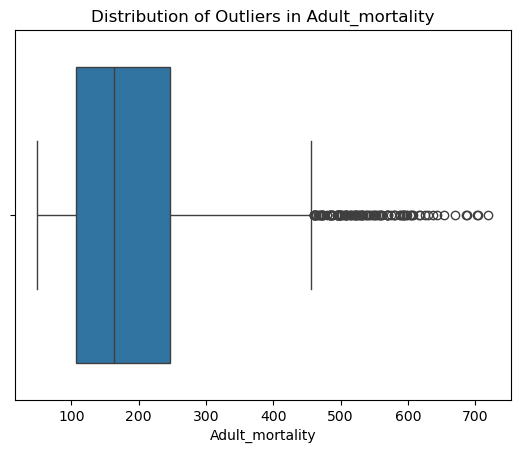

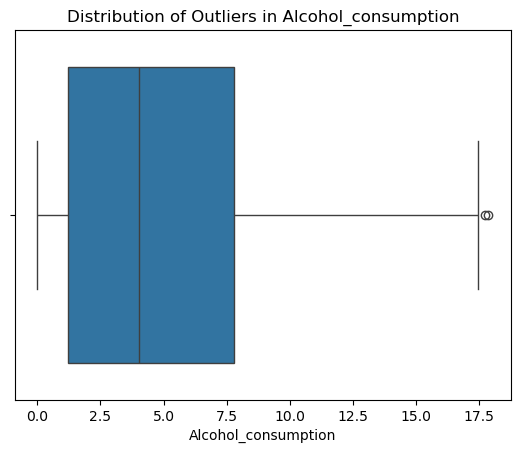

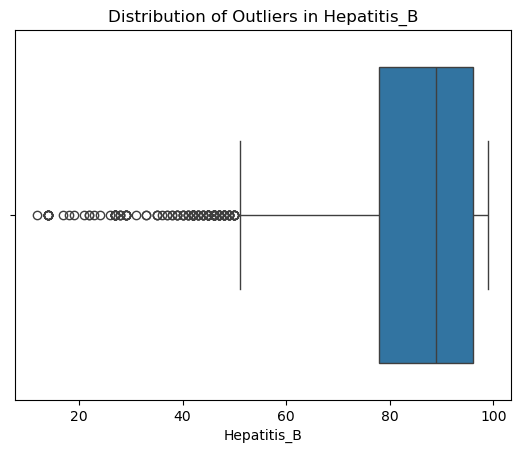

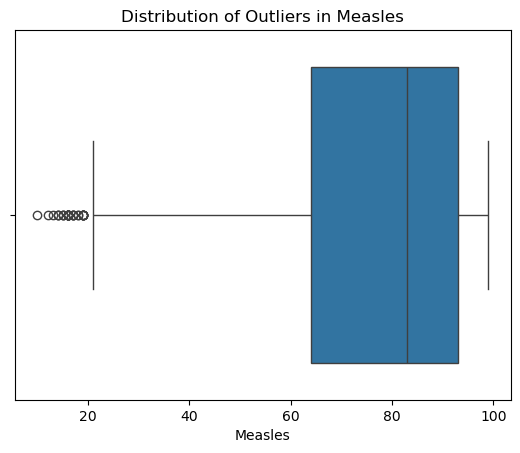

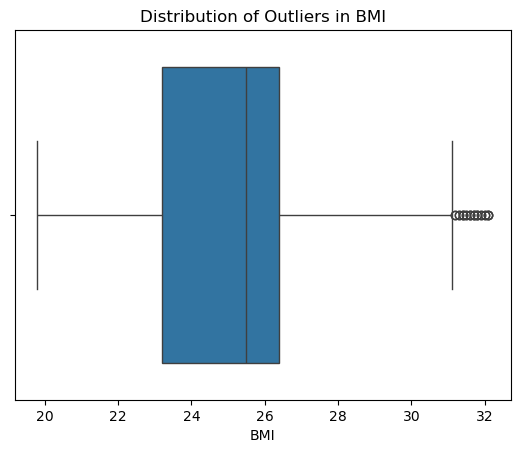

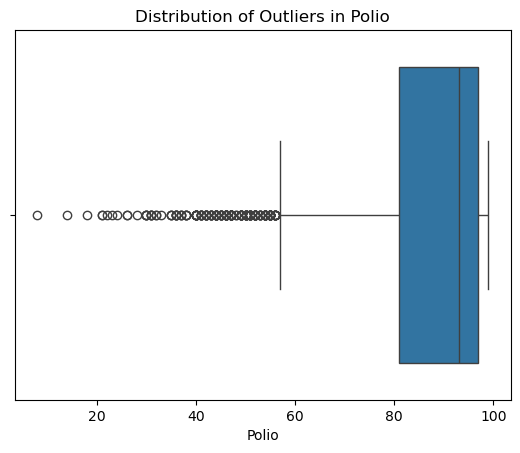

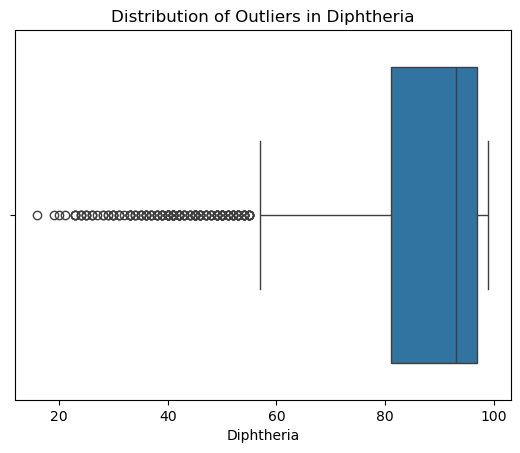

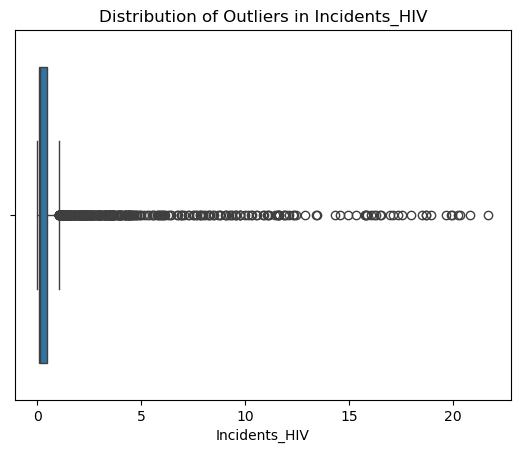

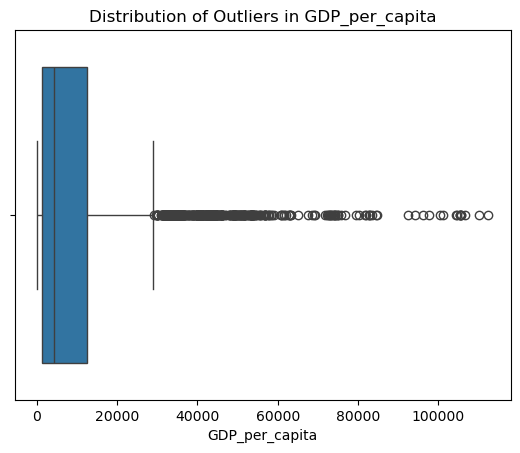

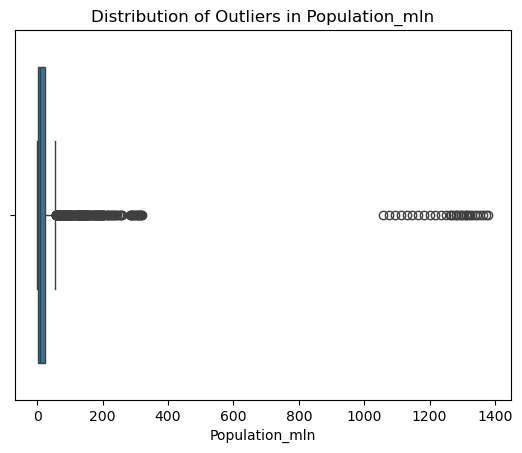

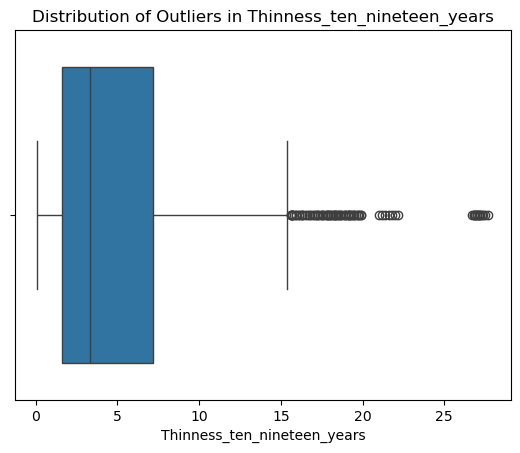

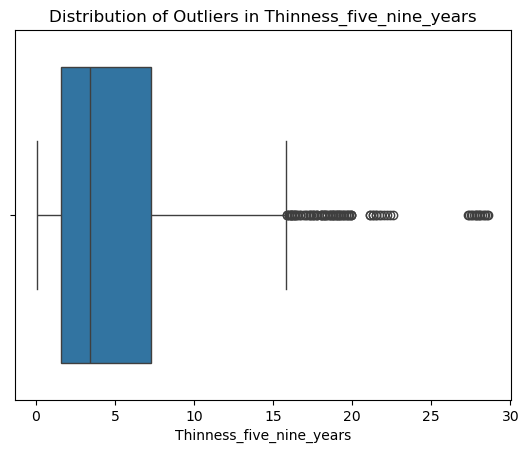

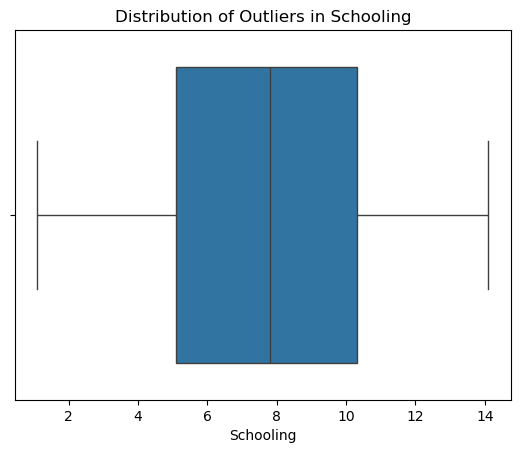

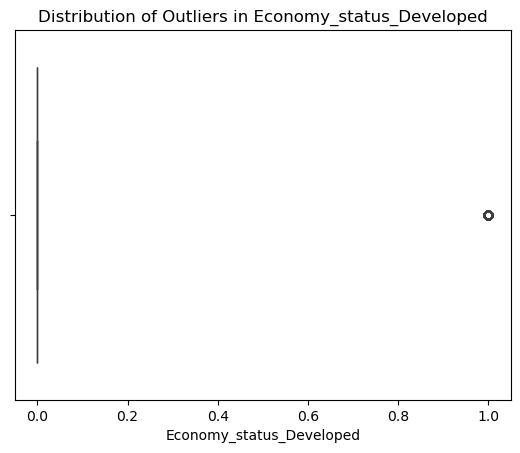

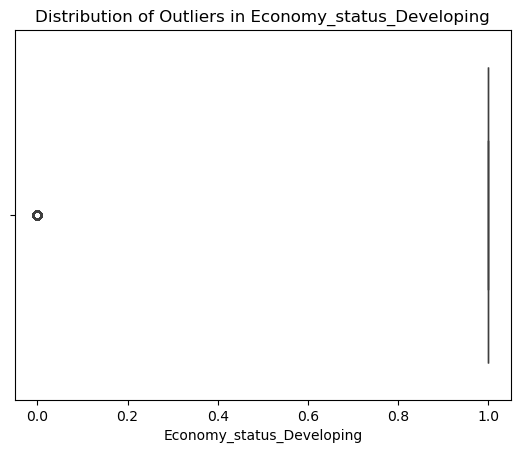

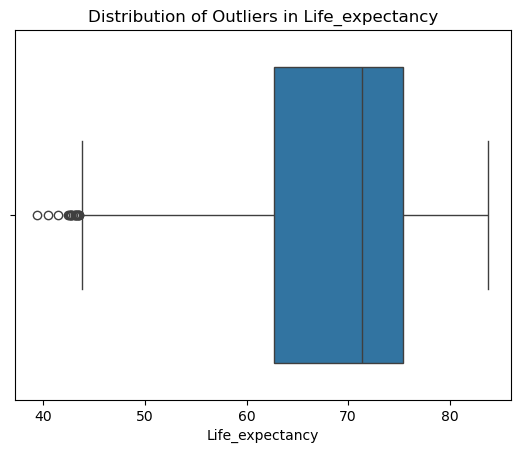

In [14]:
# Here, we will Identify the Outliers Using Boxplots

for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.title(f'Distribution of Outliers in {i}')
    plt.xlabel(i)
    plt.show()

In [15]:
# We will Check the data types of number columns here.

df.select_dtypes(include="number").columns

Index(['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Life_expectancy'],
      dtype='object')

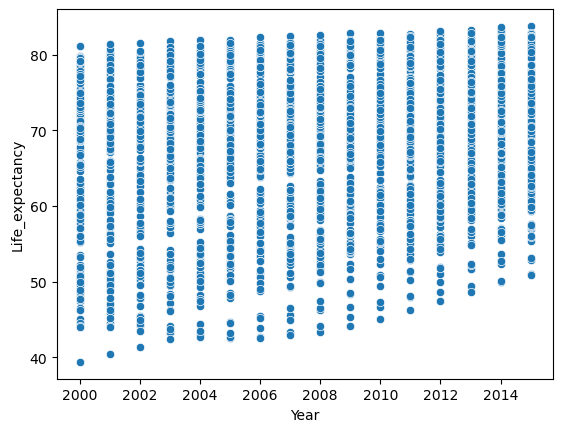

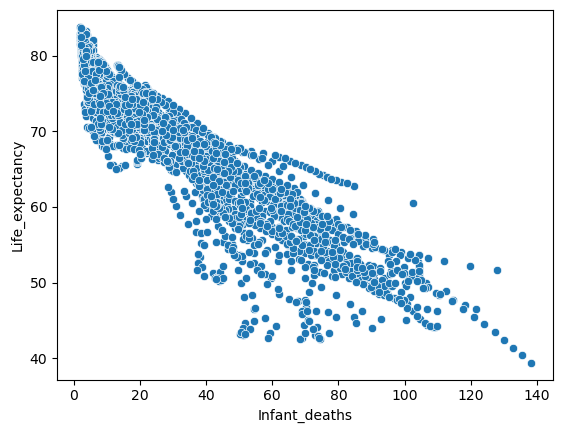

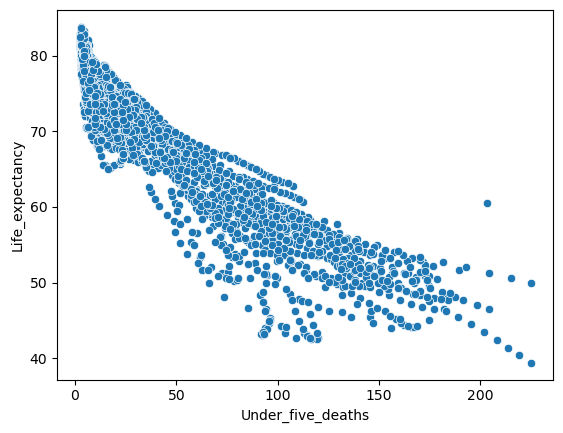

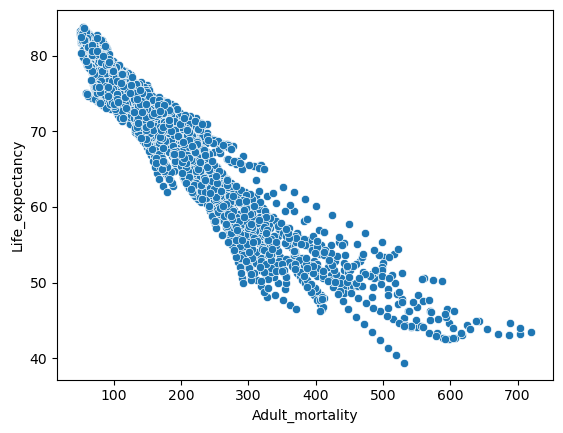

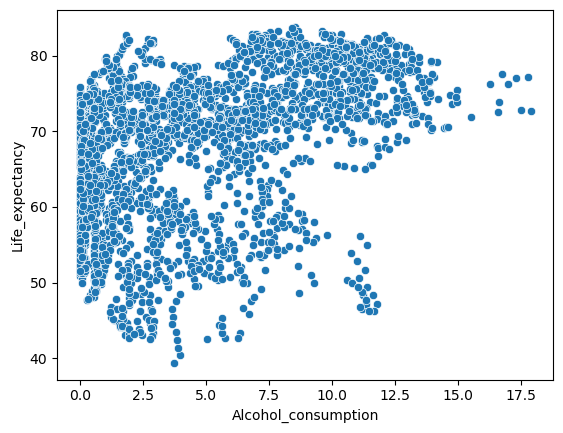

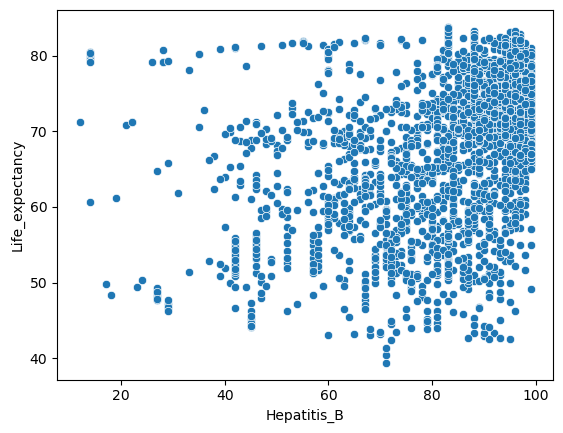

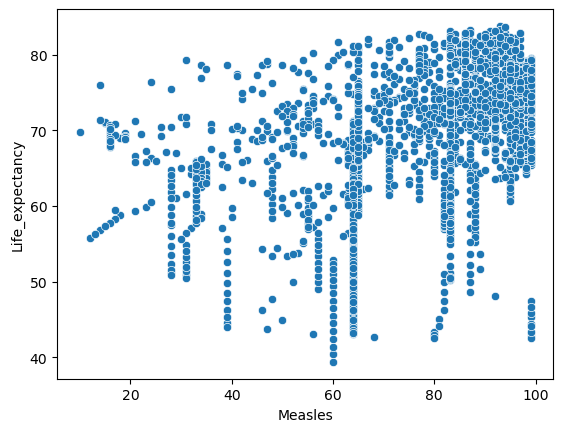

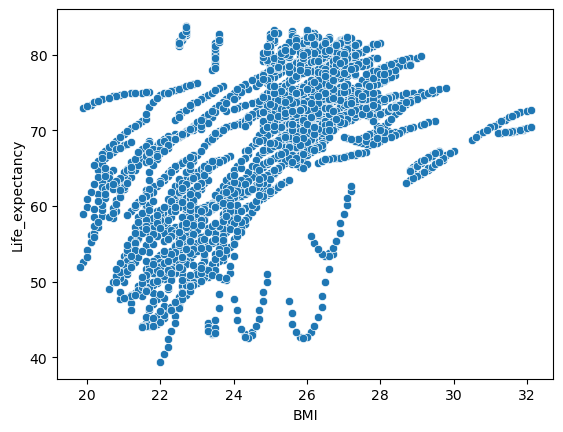

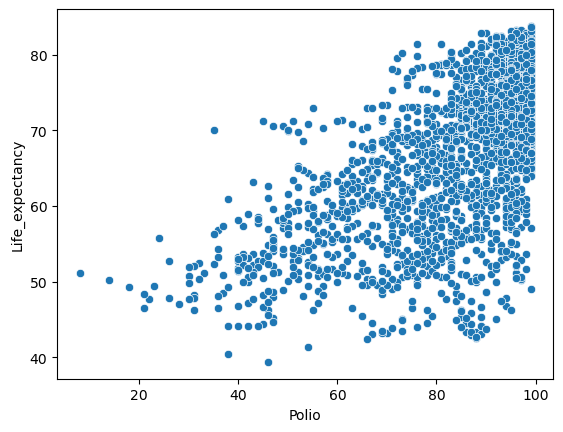

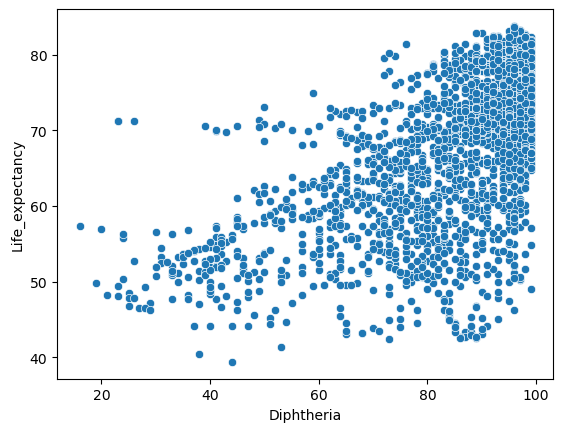

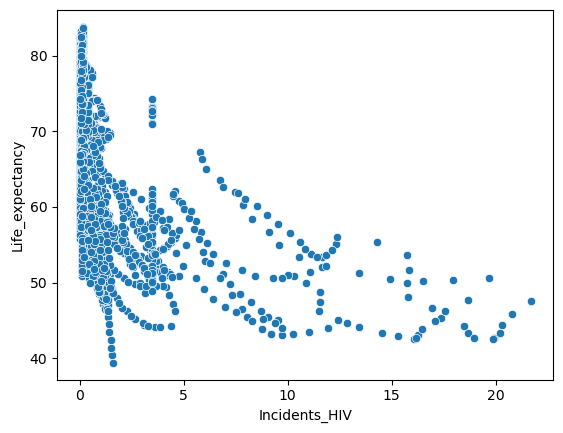

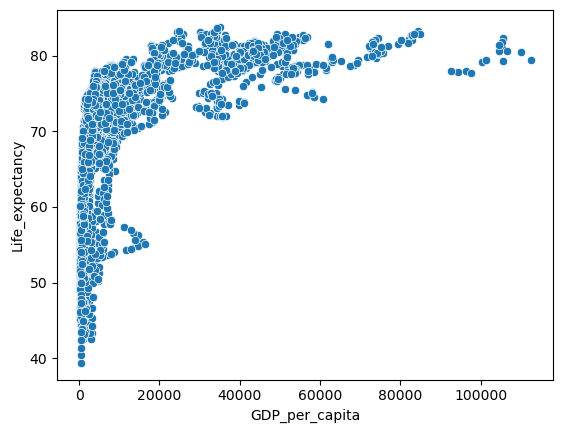

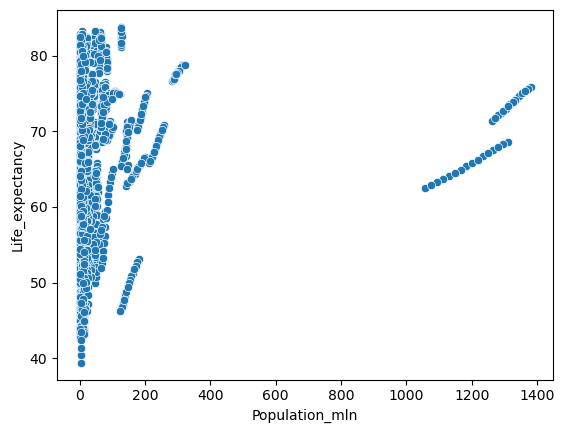

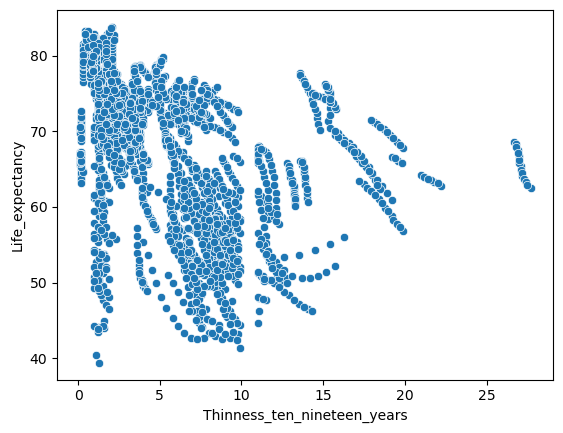

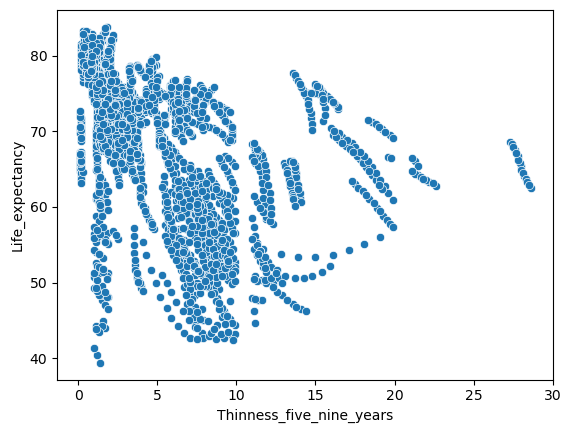

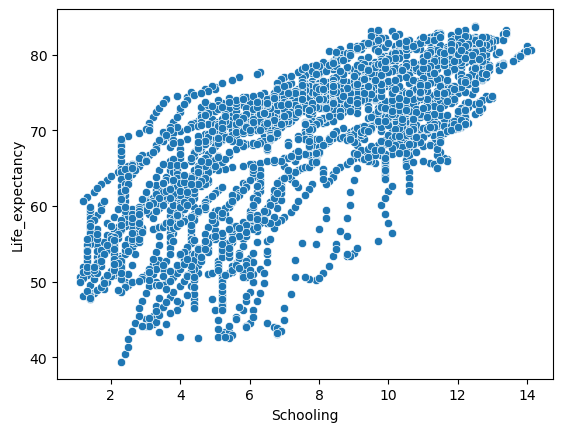

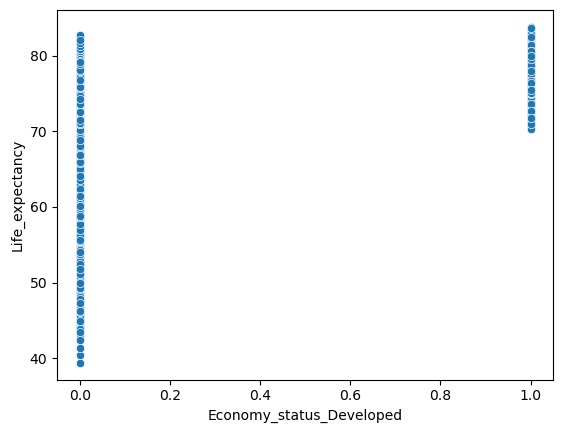

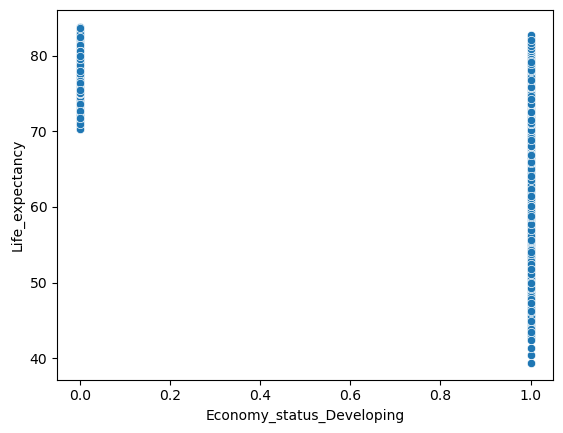

In [16]:
# Now, we will conduct Bivariant Analysis 
# This will help to understand the relationship between the target variable and each independent variable.
for i in ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing']:
    sns.scatterplot(data=df,x=i,y='Life_expectancy')
    plt.show()

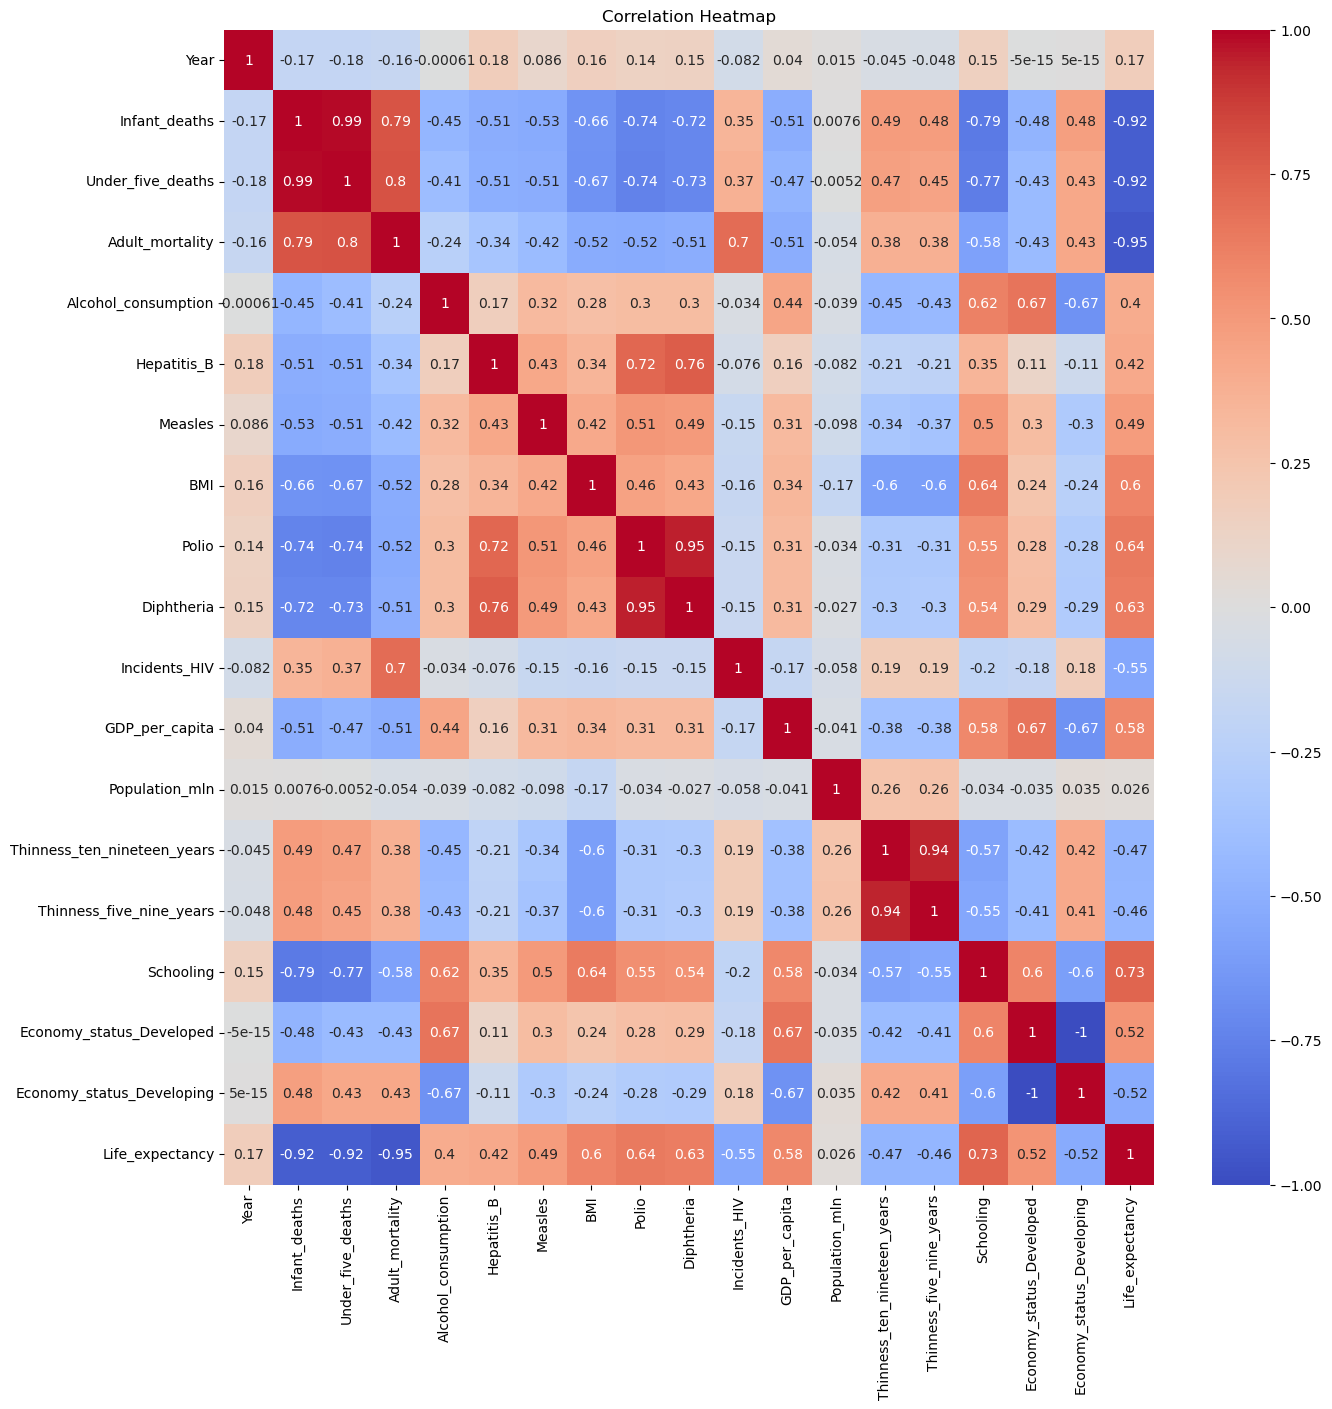

In [17]:
# Here, we will dive deep into Understanding the correlations between the numerial variables. 
# This will help to effectively interpret the relationship, multicolliniarity and prevent it from affecting our models.

#First, we will select only the numerical columns.
c=df.select_dtypes(include="number").corr()

# Then, we will set the figure size for better readability
plt.figure(figsize=(15,15))

# Next, we will plot a heatmap to visualize correlations between the numerical variables.
sns.heatmap(c, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap') #This will add a title to the map.

plt.show() #To display the correlation heatmap

**Treating Missing Values**

In [18]:
#Now, we want to fill the missing values in the selected numerical columns with the mean.

for i in ['Hepatitis_B','Polio', 'GDP_per_capita']:
    df[i] = df[i].fillna(df[i].mean())

#Then drop all other missing values (those in categorical variables)
df.dropna(inplace=True)

In [19]:
# We will now check if all our missing values have been replaced with the mean.
print("Missing Values After Cleaning:")
print(df.isnull().sum())

Missing Values After Cleaning:
Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64


****Treating Outliers****

In [20]:
# Here, we will be treating the Outliers for continuous numerical data
# We will use the interquartile range to identify and handle the outliers.

def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr #The lower whisker is the value below the considered outlier.
    uw=q3+1.5*iqr #The upper whisker is the value above the considered outlier.
    return lw,uw

In [21]:
#Now, we will apply the whisker function to the 'Infant_deaths' column.
#This will calculate both the lower and upper bounds for the outlier detention.

wisker(df['Infant_deaths'])

(np.float64(-50.774999999999984), np.float64(106.22499999999998))

In [22]:
# Here we will apply the wisker function to the remaining numerical columns
# This will prevent extreme values from skewing our analysis with completely removing our data points.

for i in ['Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy']:
    lw, uw=wisker(df[i])
    df[i]=np.where(df[i]<lw, lw, df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

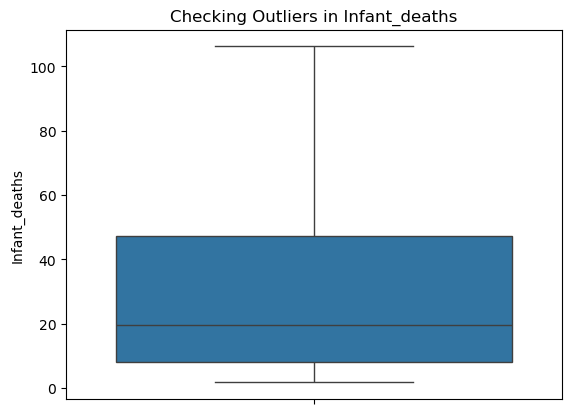

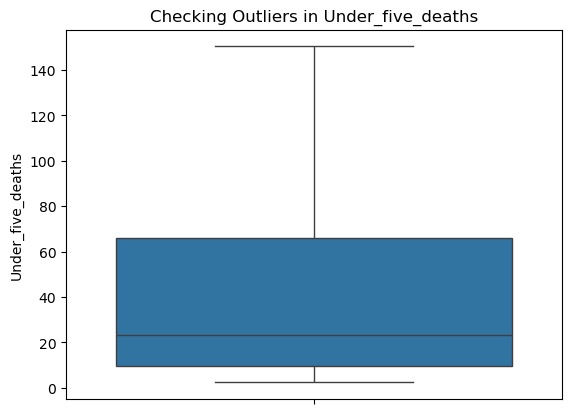

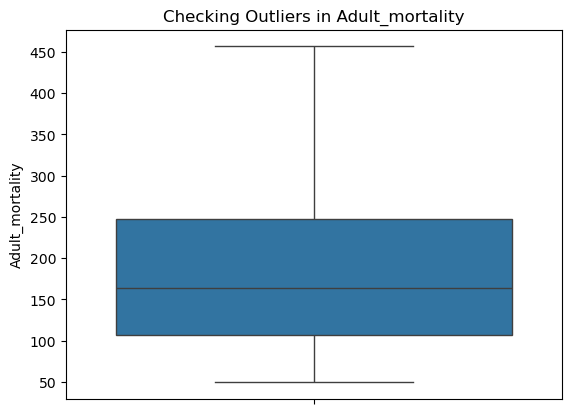

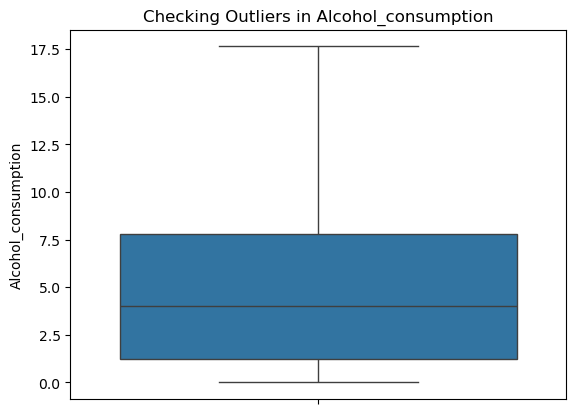

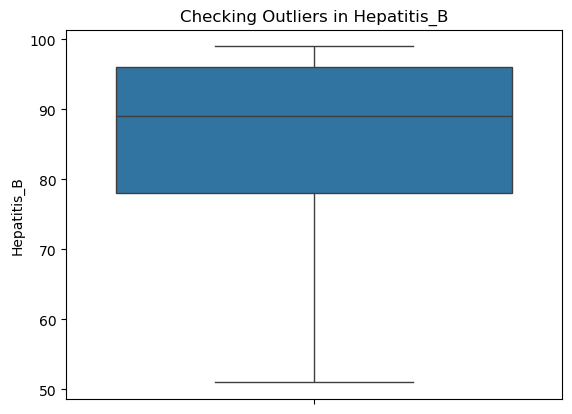

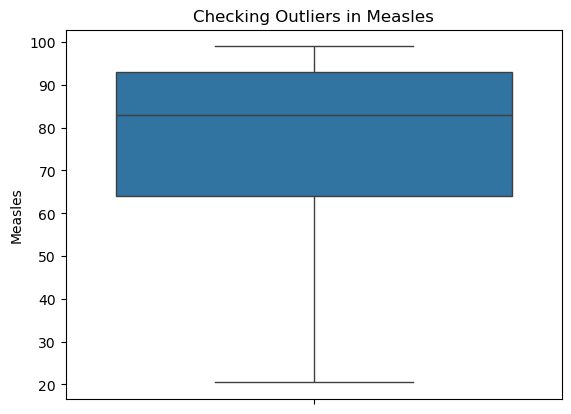

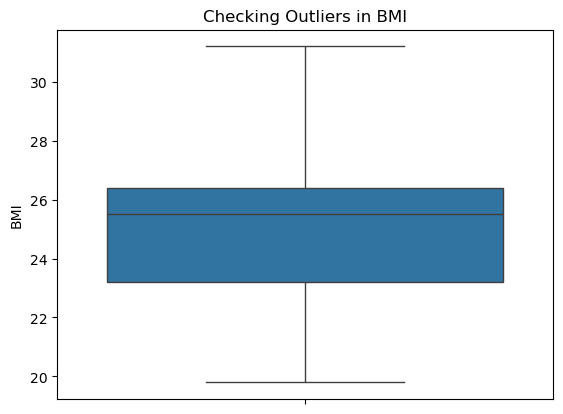

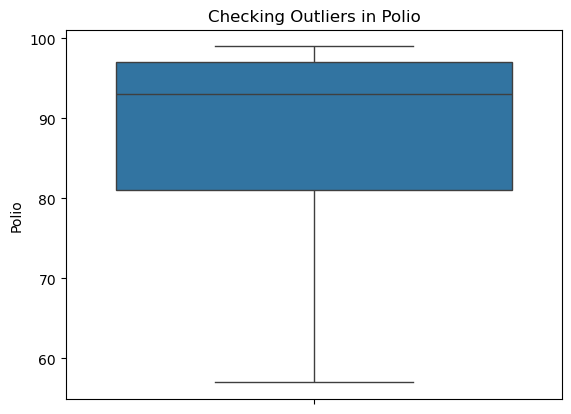

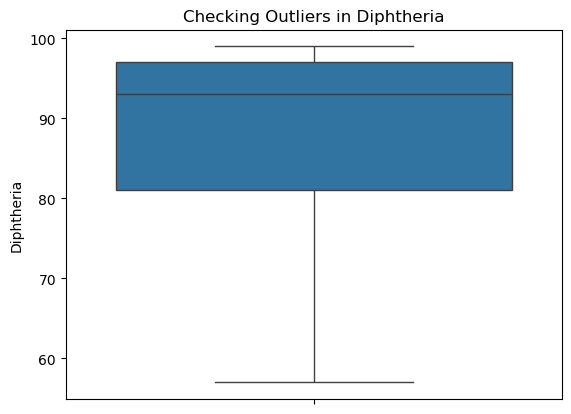

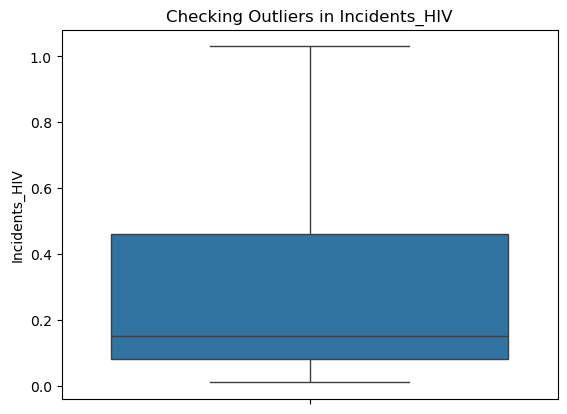

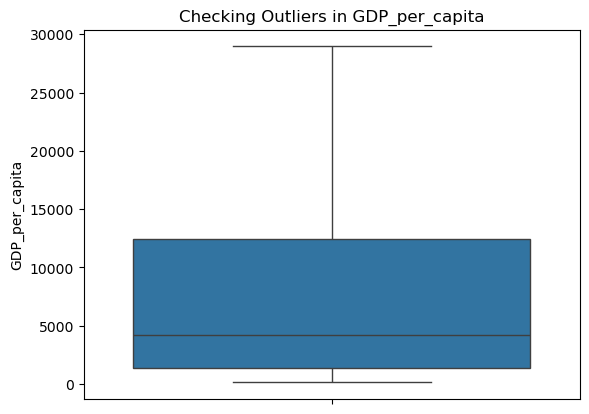

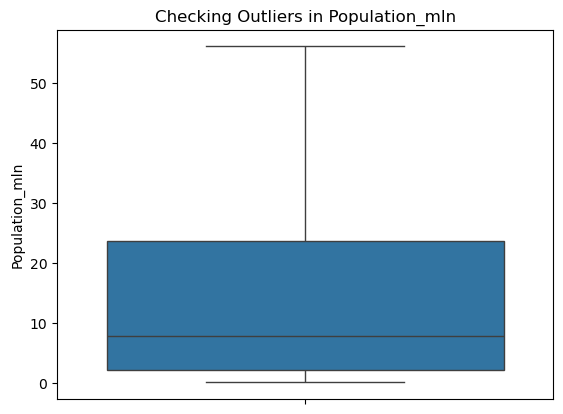

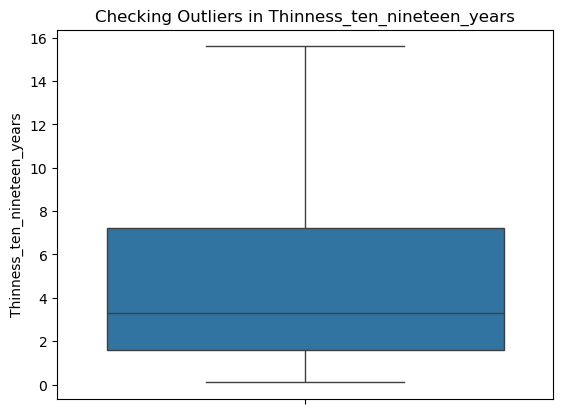

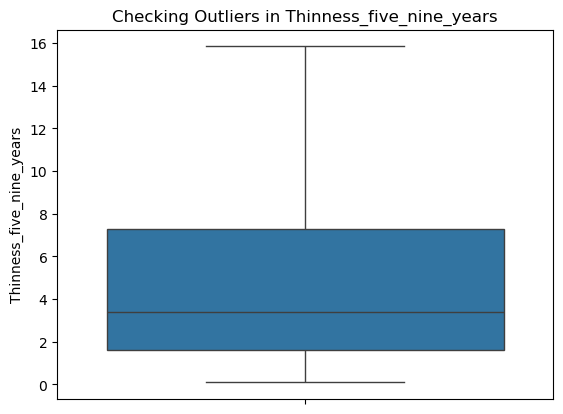

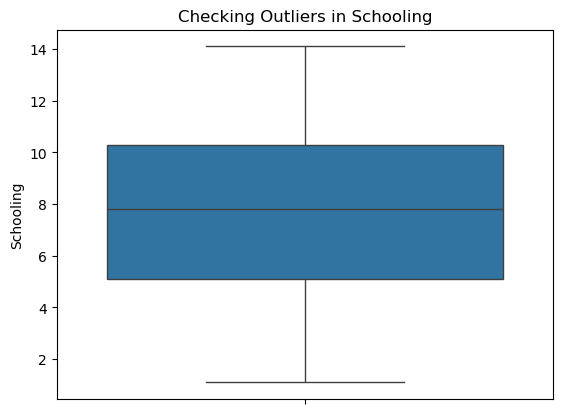

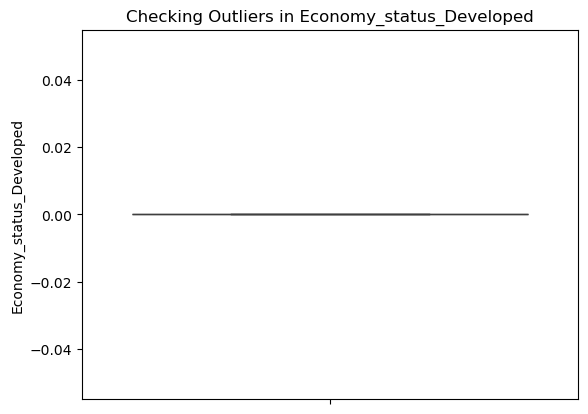

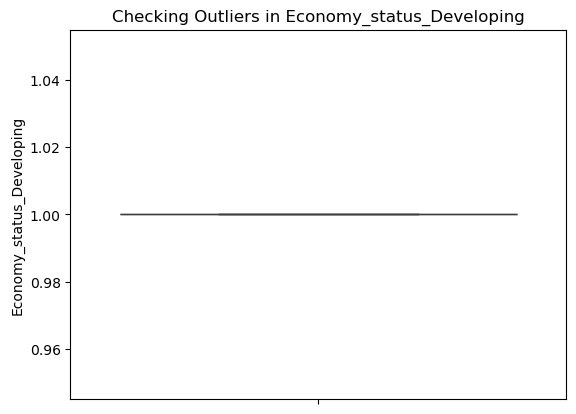

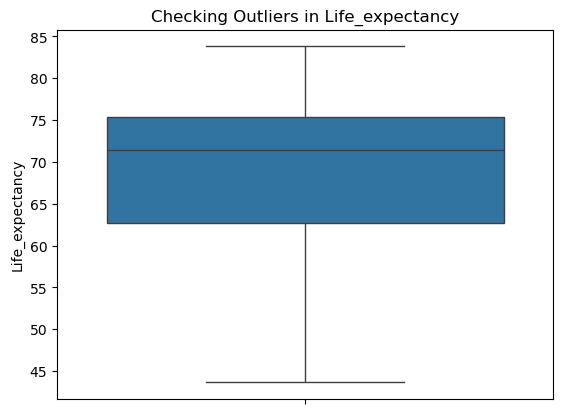

In [23]:
# Now, we will create boxplot to confirm that outliers have been treated.

for i in ['Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy']:
    sns.boxplot(df[i]) #To plot Boxplot for each column with outliers
    plt.title(f"Checking Outliers in {i}")
    plt.show() # Display the plot

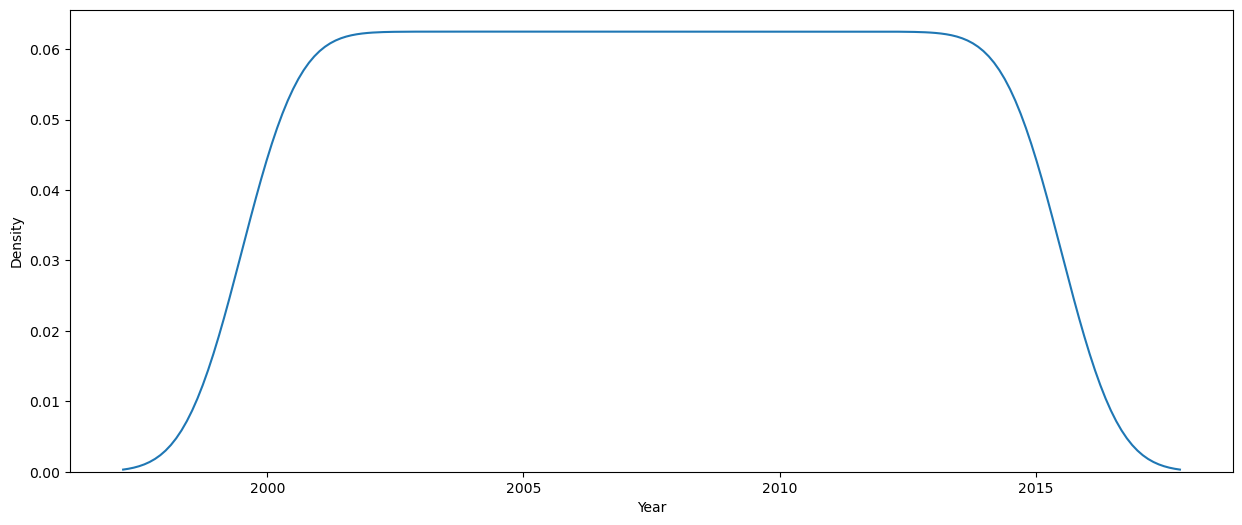

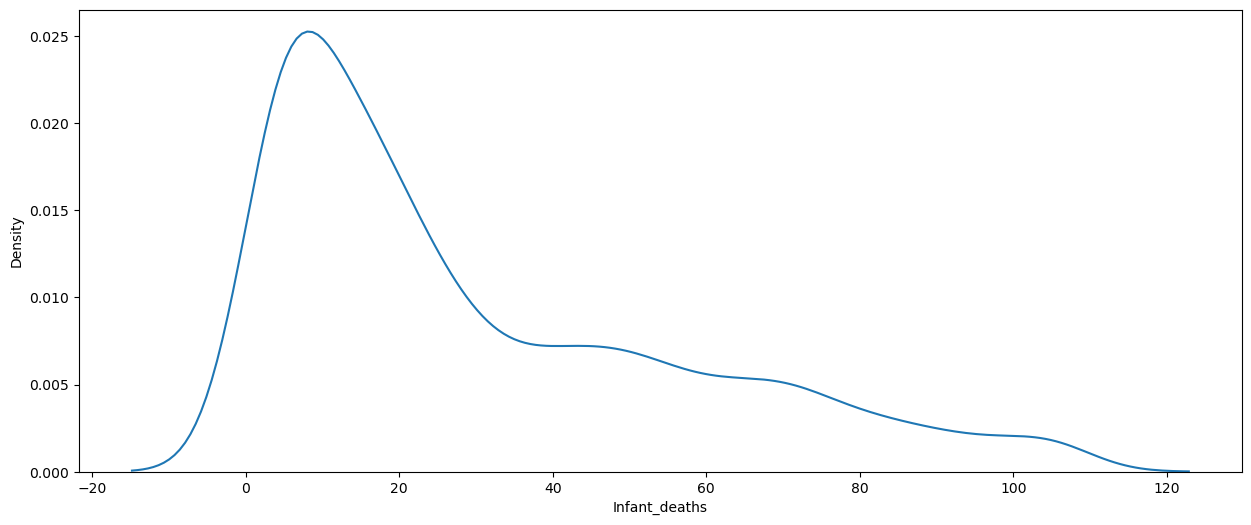

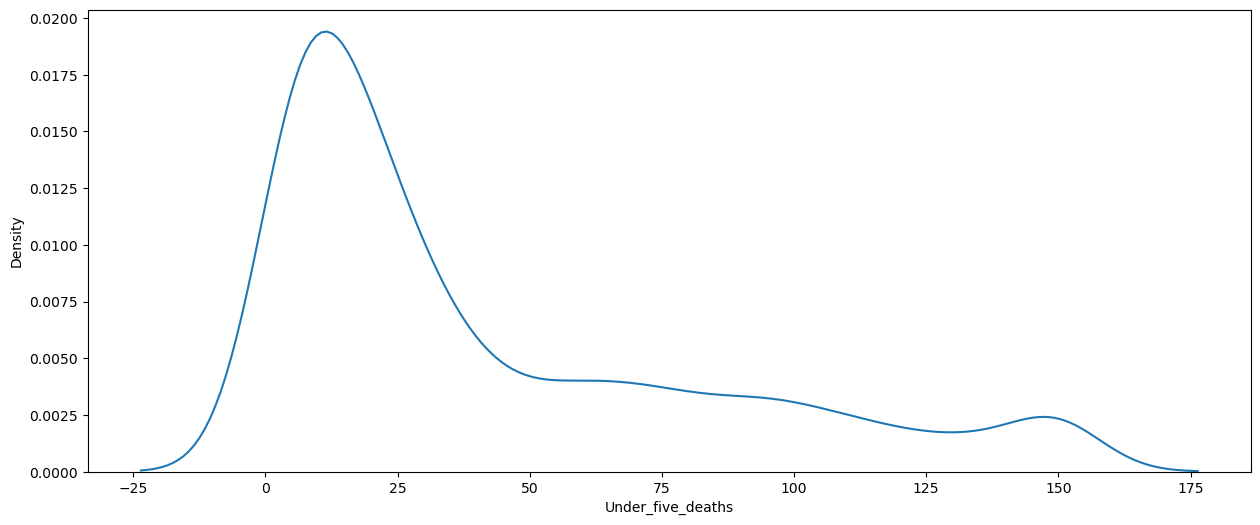

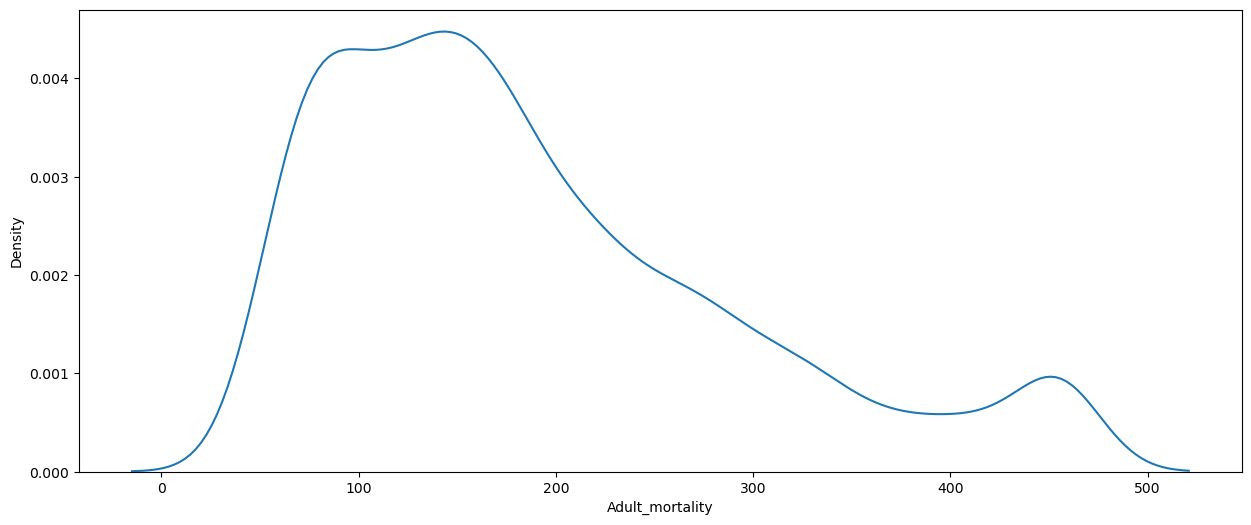

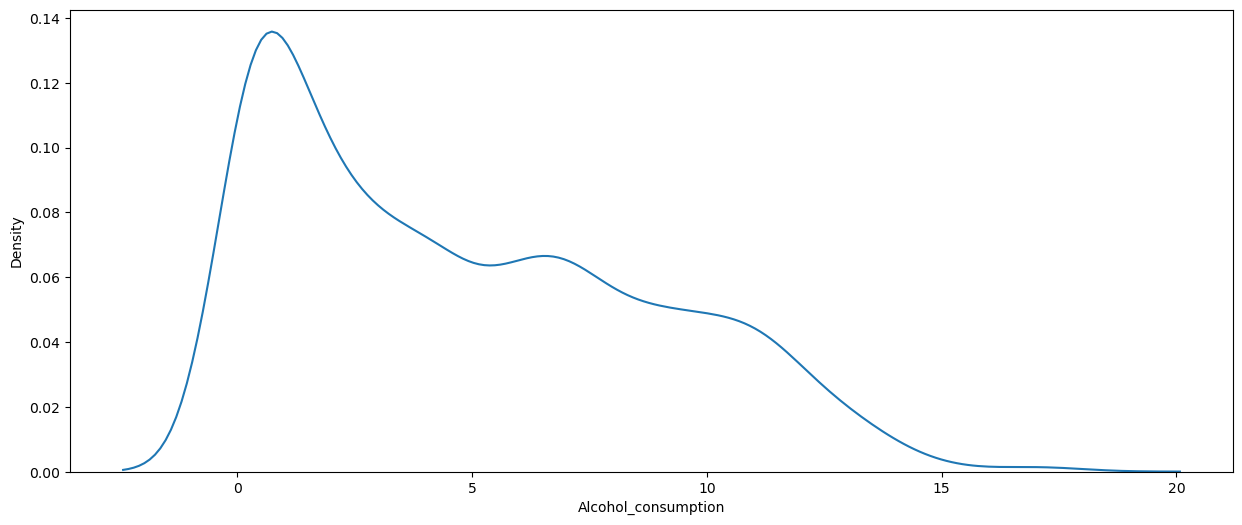

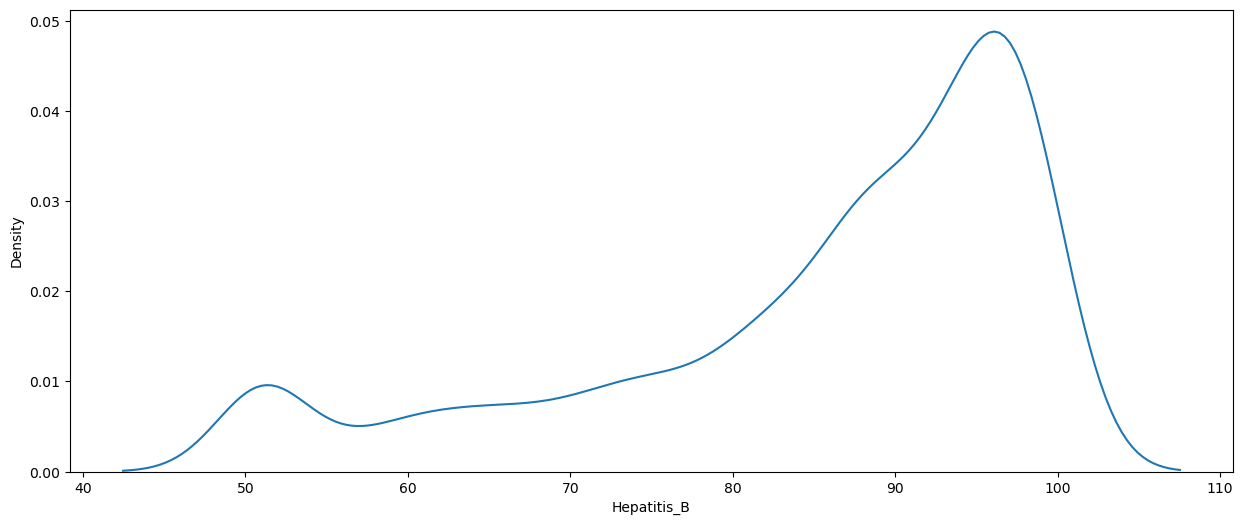

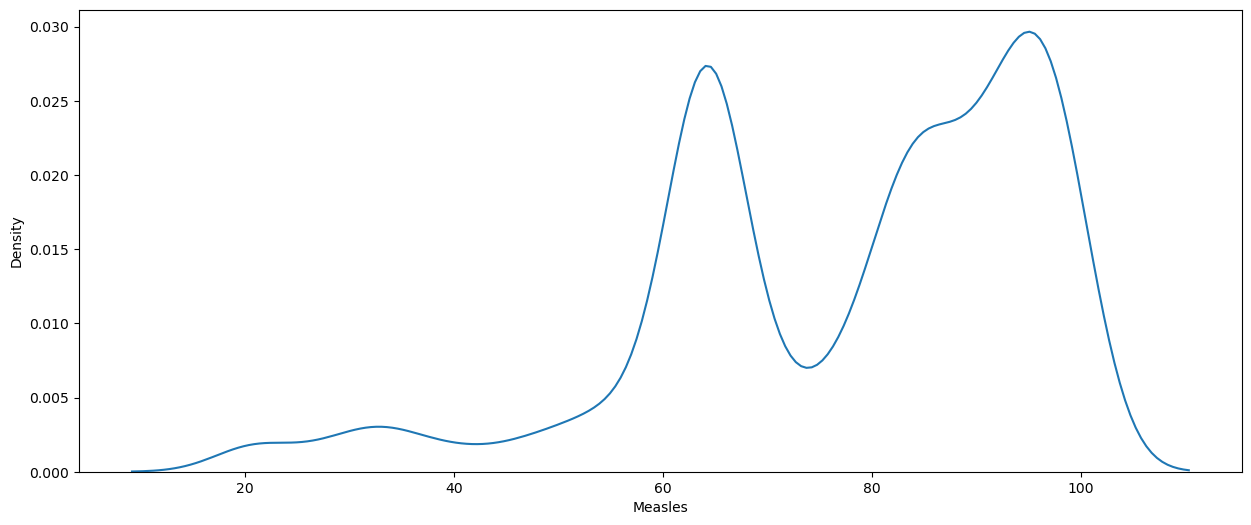

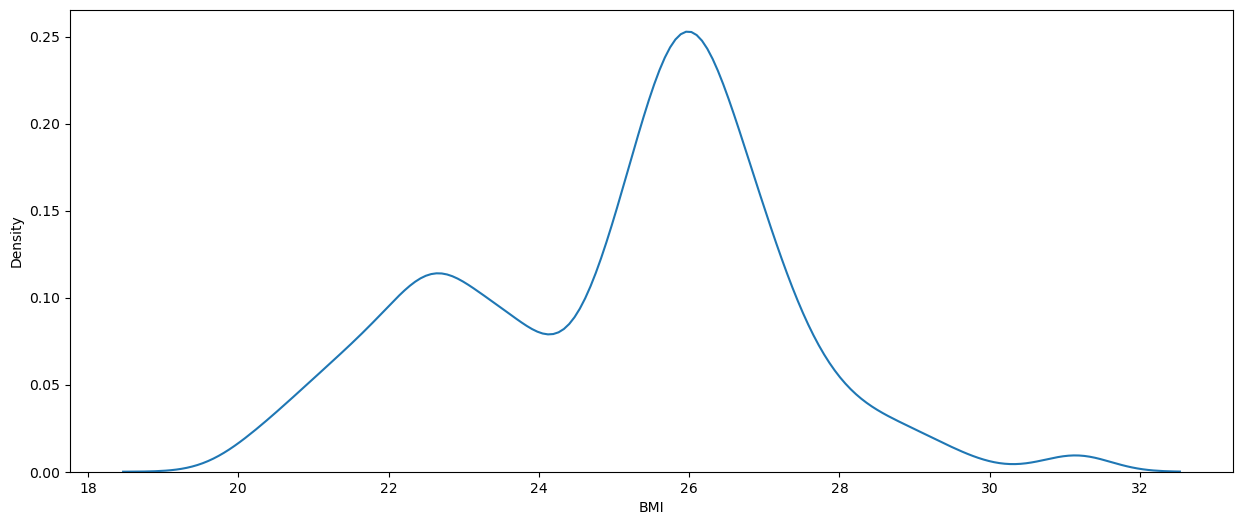

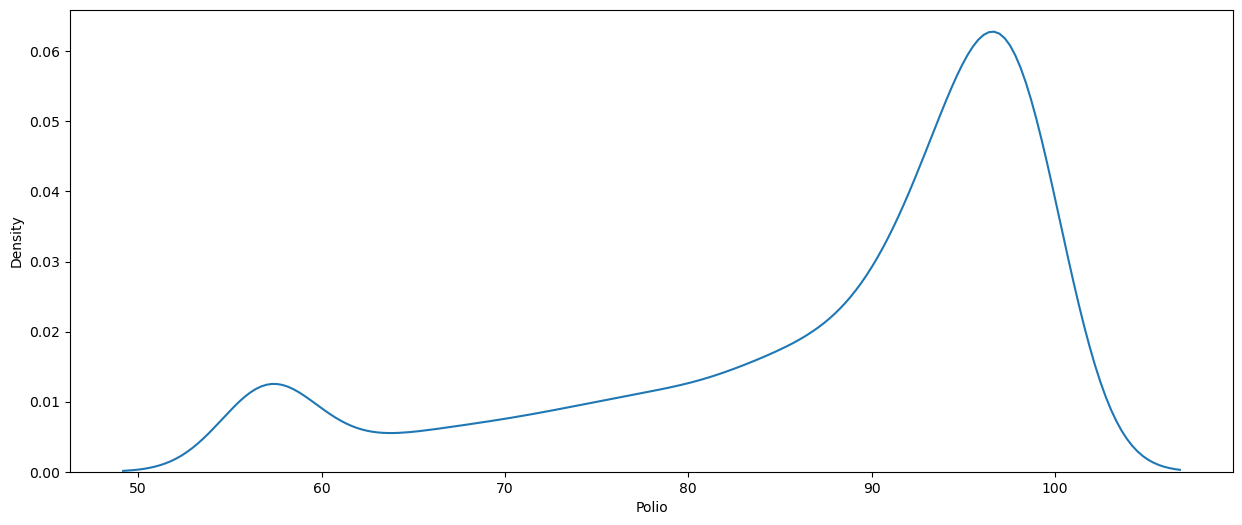

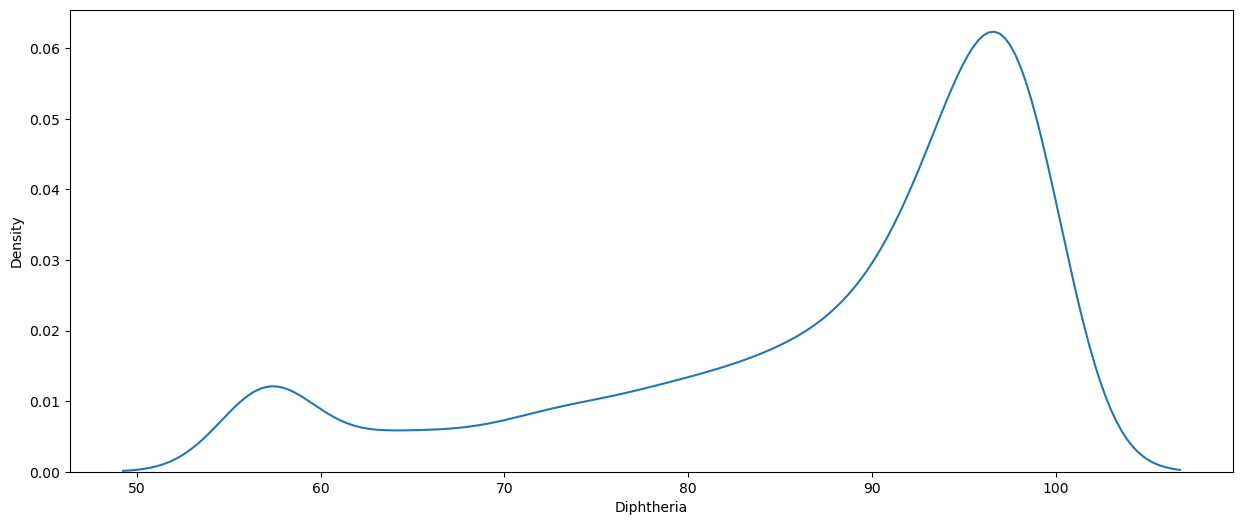

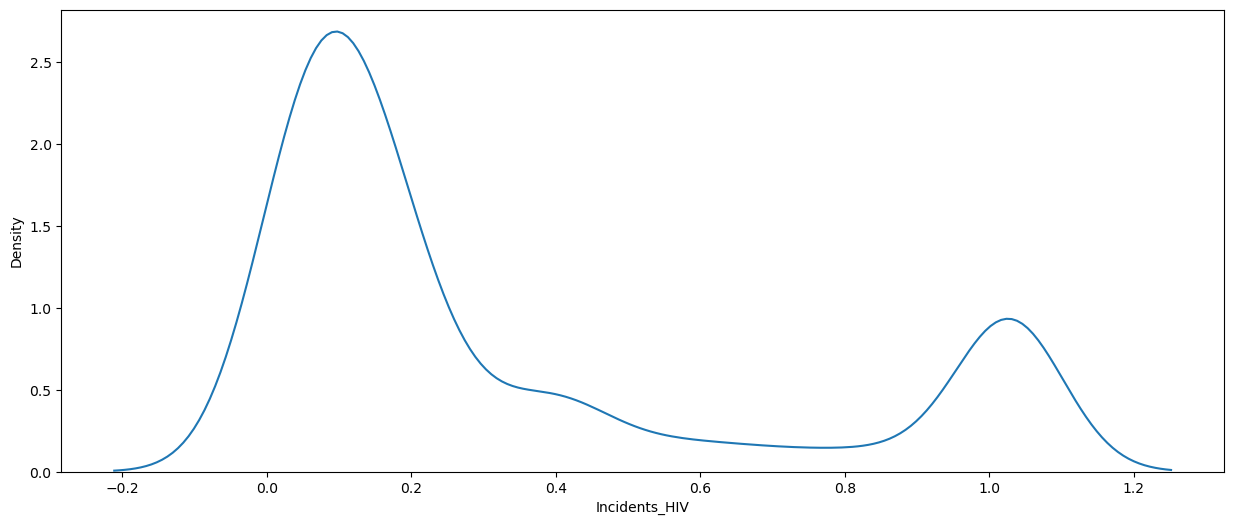

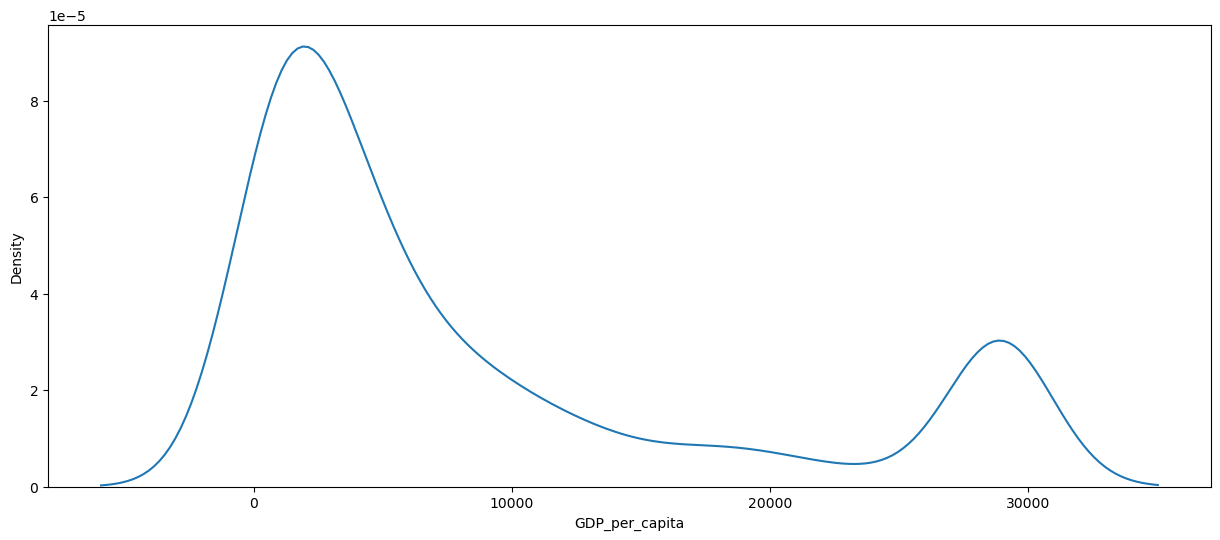

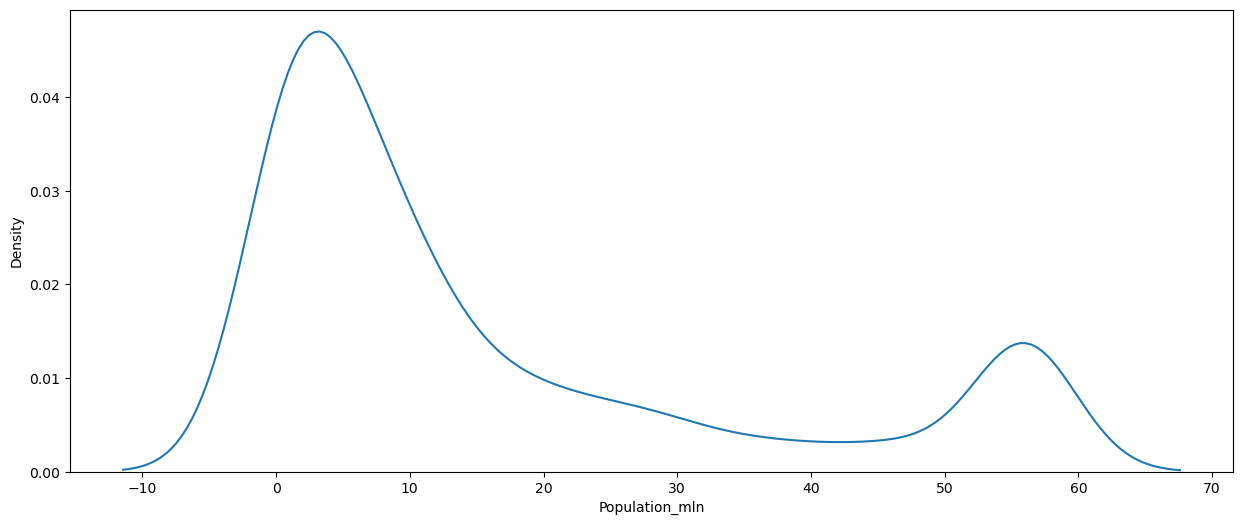

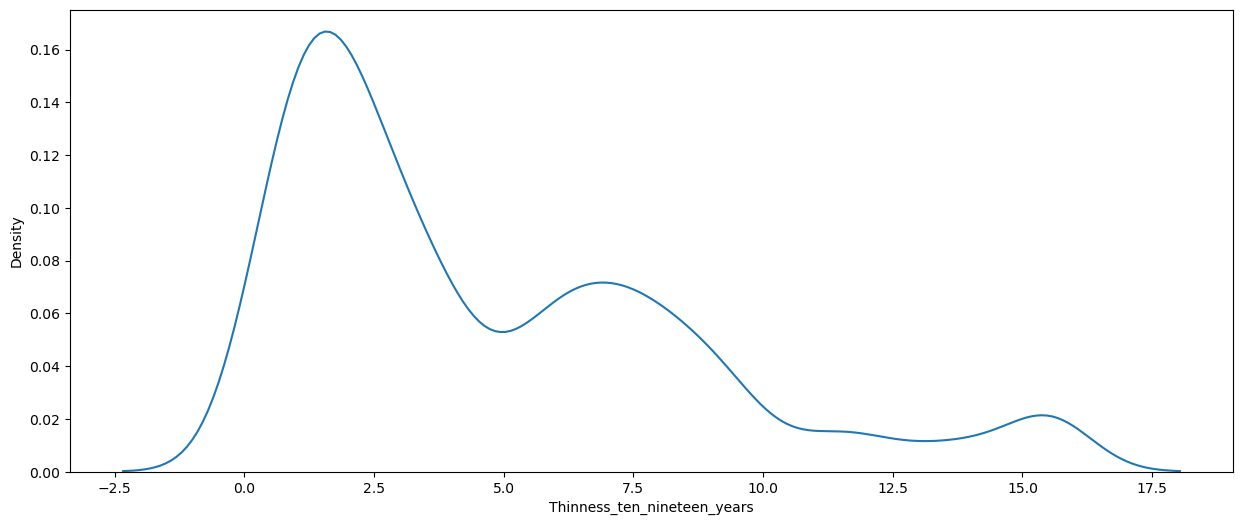

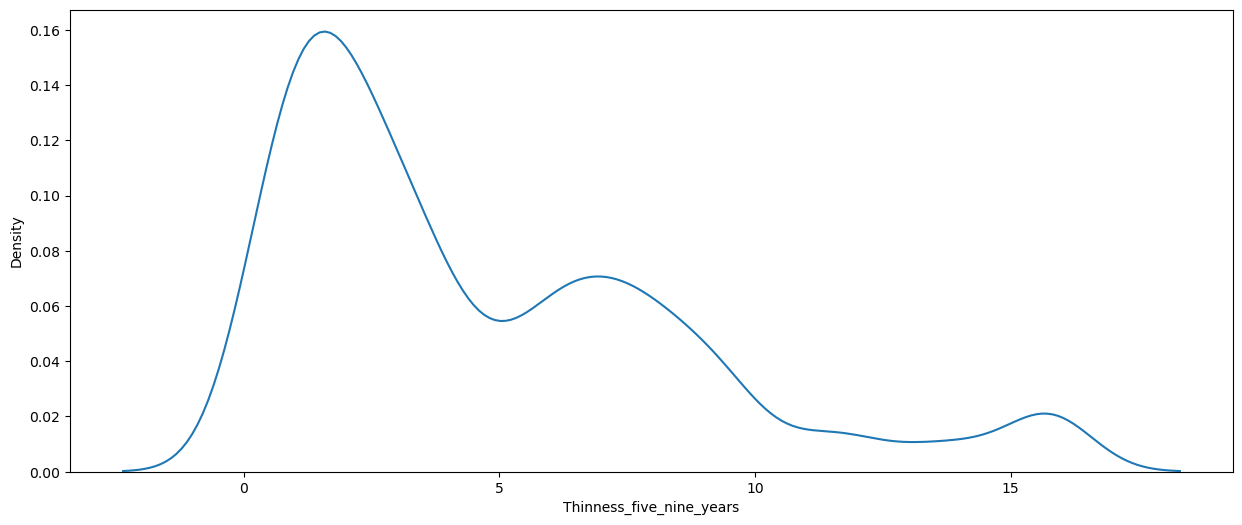

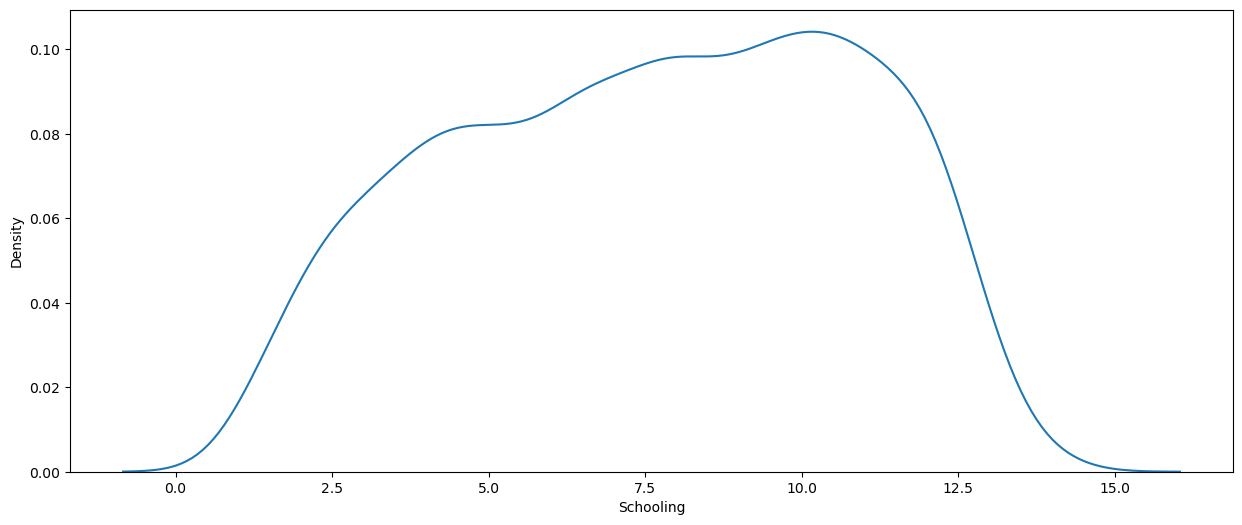

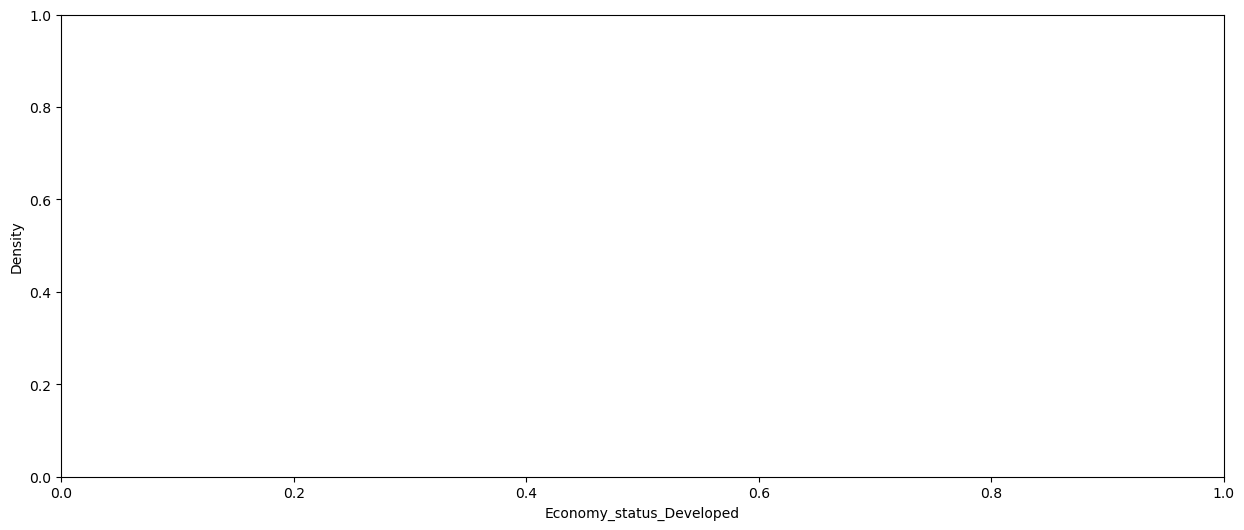

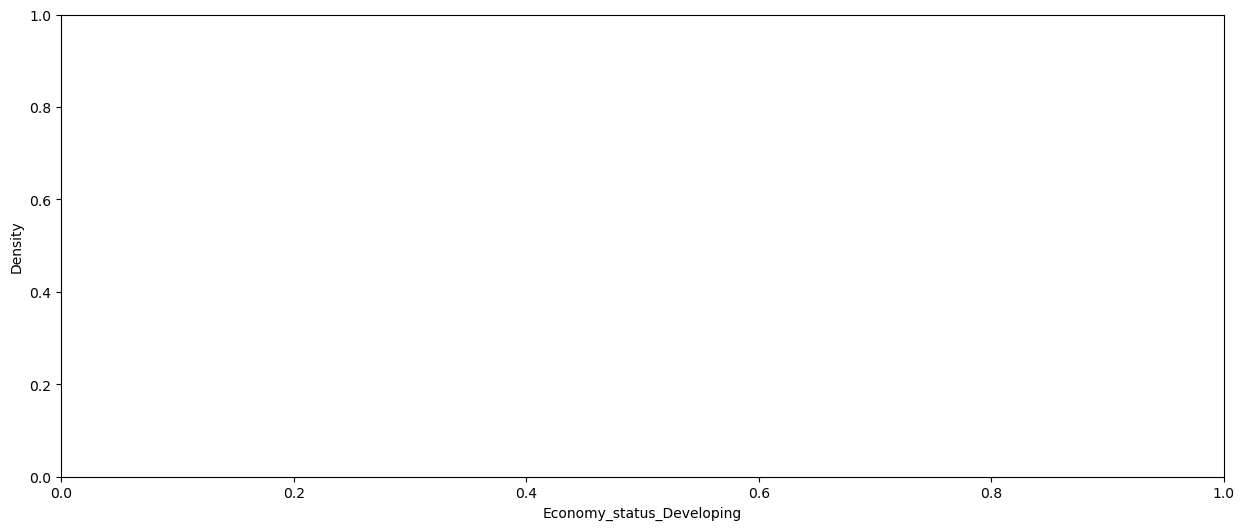

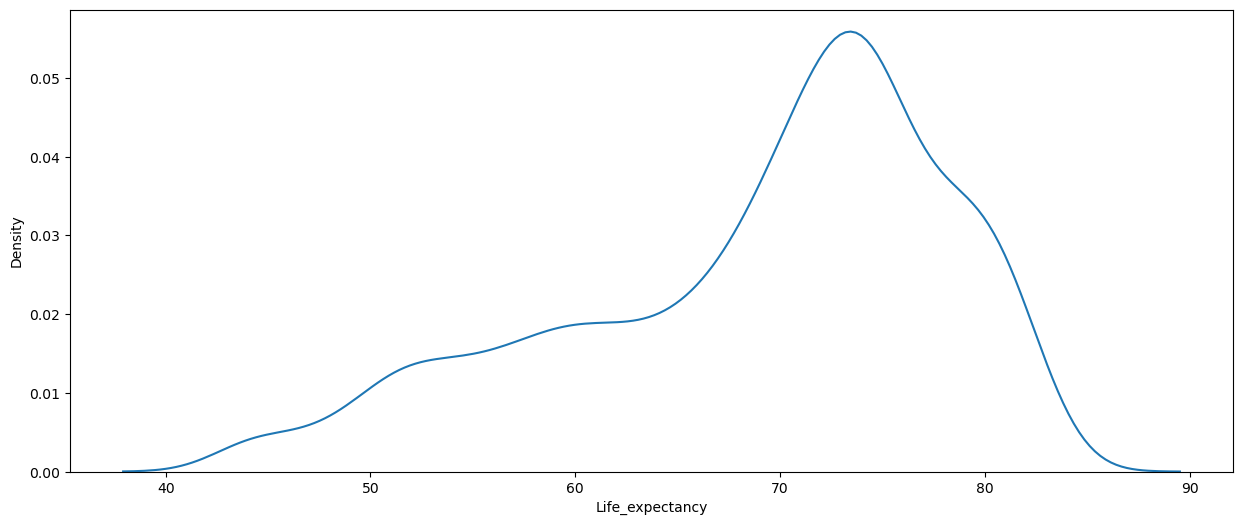

In [24]:
# Here, we intend to understand the skewness of the dataset

#First, we will loop through alll numerical columns in the dataset.

for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(15,6)) #Then, set a large figure size for better readability.
    sns.kdeplot(data=df,x=i)
    plt.show()

# Model Engineering
The following steps will be taken to enable us derive the best result from each model.
1) Perform pre-processing operations on the data (encoding, scaling, splitting)
2) Develop a baseline model 
3) Evaluate baseline model using appropriate performance metrics (& cross validation)
4) Perform feature selection
    * Using varianceThreshold method
    * Using RFE method
5) Evaluate enhanced model after feature selection.
6) Perform Hyper-parameter tunning to improve the model's performance.
    * Using RandomisedSearchCV`
    * Evaluate and Note the best hyper-parameter combination
    * Using `GridSearchCV` starting with parameters around the ones from the `RandomiedSearchCV`
    * Evaluate the gridsearch resulting model
7) Repeat steps 2 - 6 again for two more models
8) Conclusion

**Seperating the Features from the Target**

In [25]:
# Here we will seperate the dataset into independent variables (X) and the target variagble (y)
# The "X" variable contains all predictor featured, while y contains the Life Expectancy results.

x = df.drop('Life_expectancy',axis=1)
y = df['Life_expectancy']

x.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  \
0         105.8240                 1.32         97.0     65.0  27.8   97.0   
1          57.9025                10.35         97.0     94.0  26.0   97.0   
2         201.0765                 1.57         60.0     35.0  21.2   67.0   
3         222.1965                 5.68         93.0     74.0  25.3   92.0   
4          57.9510                 2.89         97.0     89.0  27.0   94.0   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0        97.0           0.08         11006.0         56.0725   
1        97.0           0.09         25742.0         46.4400   
2        64.0           0.13          1076.0         56.0725   
3        93.0           0.79          4146.0          0.7500   
4        94.0           0.08         28959.5          7.9100   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                      4.80        7.8   
1                          0.6                      0.50        9.7   
2                         15.6                     15.85        5.0   
3                          5.7                      5.50        7.9   
4                          1.2                      1.10       12.8   

   Economy_status_Developed  Economy_status_Developing  
0                       0.0                        1.0  
1                       0.0                        1.0  
2                       0.0                        1.0  
3                       0.0                        1.0  
4                       0.0                        1.0

In [26]:
y.head()

0    76.5
1    82.8
2    65.4
3    67.0
4    81.7
Name: Life_expectancy, dtype: float64

**Feature Encoding and Scaling**

***Encoding***

In [27]:
#encoding the Countries column with label encoding becuase using OneHot Encoding inflates the dataset as the there are over 160 countries
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_countires = label_encoder.fit_transform(x["Country"])
encoded_countires[:5]

array([164, 148,  74,  69,  79])

In [28]:
#export a dataframe containing a table of the countries and the generated code for future use
countries_df = pd.DataFrame({
    "Country": x["Country"].unique(),
    "Code": pd.Series(encoded_countires).unique()
})

countries_df.to_csv("./data/exported/encoded_countries.csv", index=False) #save the countries and their assigned code

In [29]:
#encoding the Region column with OneHot as it is the preffered for norminal features (as long as there aren't too many varieties)
x_encoded = pd.get_dummies(data = x, columns = ['Region'], dtype=int, drop_first=True)
x_encoded.head() #display x data

Country  Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
0  Turkiye  2015           11.1               13.0         105.8240   
1    Spain  2015            2.7                3.3          57.9025   
2    India  2007           51.5               67.9         201.0765   
3   Guyana  2006           32.8               40.5         222.1965   
4   Israel  2012            3.4                4.3          57.9510   

   Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  ...  \
0                 1.32         97.0     65.0  27.8   97.0  ...   
1                10.35         97.0     94.0  26.0   97.0  ...   
2                 1.57         60.0     35.0  21.2   67.0  ...   
3                 5.68         93.0     74.0  25.3   92.0  ...   
4                 2.89         97.0     89.0  27.0   94.0  ...   

   Economy_status_Developed  Economy_status_Developing  Region_Asia  \
0                       0.0                        1.0            0   
1                       0.0                        1.0            0   
2                       0.0                        1.0            1   
3                       0.0                        1.0            0   
4                       0.0                        1.0            0   

   Region_Central America and Caribbean  Region_European Union  \
0                                     0                      0   
1                                     0                      1   
2                                     0                      0   
3                                     0                      0   
4                                     0                      0   

   Region_Middle East  Region_North America  Region_Oceania  \
0                   1                     0               0   
1                   0                     0               0   
2                   0                     0               0   
3                   0                     0               0   
4                   1                     0               0   

   Region_Rest of Europe  Region_South America  
0                      0                     0  
1                      0                     0  
2                      0                     0  
3                      0                     1  
4                      0                     0  

[5 rows x 27 columns]

Merge the countries with their codes in the `df_encoded` dataframe

In [30]:
x_encoded["Country"] = encoded_countires
x_encoded.head()

Country  Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
0      164  2015           11.1               13.0         105.8240   
1      148  2015            2.7                3.3          57.9025   
2       74  2007           51.5               67.9         201.0765   
3       69  2006           32.8               40.5         222.1965   
4       79  2012            3.4                4.3          57.9510   

   Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  ...  \
0                 1.32         97.0     65.0  27.8   97.0  ...   
1                10.35         97.0     94.0  26.0   97.0  ...   
2                 1.57         60.0     35.0  21.2   67.0  ...   
3                 5.68         93.0     74.0  25.3   92.0  ...   
4                 2.89         97.0     89.0  27.0   94.0  ...   

   Economy_status_Developed  Economy_status_Developing  Region_Asia  \
0                       0.0                        1.0            0   
1                       0.0                        1.0            0   
2                       0.0                        1.0            1   
3                       0.0                        1.0            0   
4                       0.0                        1.0            0   

   Region_Central America and Caribbean  Region_European Union  \
0                                     0                      0   
1                                     0                      1   
2                                     0                      0   
3                                     0                      0   
4                                     0                      0   

   Region_Middle East  Region_North America  Region_Oceania  \
0                   1                     0               0   
1                   0                     0               0   
2                   0                     0               0   
3                   0                     0               0   
4                   1                     0               0   

   Region_Rest of Europe  Region_South America  
0                      0                     0  
1                      0                     0  
2                      0                     0  
3                      0                     1  
4                      0                     0  

[5 rows x 27 columns]

**Feature Scaling**  
Using Normalisation (MinMaxScaler)

In [31]:
# We wiLl proceed to import MinMaxScaler to normalise the dataset to ensure all features
# contributes equally to the model by scaling them to a common range

from sklearn.preprocessing import MinMaxScaler

#Initialise the MinMaxScaler by creating an instance.
normaliser = MinMaxScaler()

#Then, fit the scaler on the dataset and transform the features
#Afterwards, we will convert the result back into a Dataframe with the original column names.
x_scaled = pd.DataFrame(normaliser.fit_transform(x_encoded), columns = x_encoded.columns)
x_scaled.head()

Country      Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
0  0.921348  1.000000       0.089059           0.072206         0.138595   
1  0.831461  1.000000       0.008619           0.006748         0.020918   
2  0.415730  0.466667       0.475940           0.442682         0.372499   
3  0.387640  0.400000       0.296864           0.257782         0.424362   
4  0.443820  0.800000       0.015322           0.013496         0.021037   

   Alcohol_consumption  Hepatitis_B   Measles       BMI     Polio  ...  \
0             0.074814     0.958333  0.566879  0.701754  0.952381  ...   
1             0.586610     0.958333  0.936306  0.543860  0.952381  ...   
2             0.088983     0.187500  0.184713  0.122807  0.238095  ...   
3             0.321927     0.875000  0.681529  0.482456  0.833333  ...   
4             0.163797     0.958333  0.872611  0.631579  0.880952  ...   

   Economy_status_Developed  Economy_status_Developing  Region_Asia  \
0                       0.0                        0.0          0.0   
1                       0.0                        0.0          0.0   
2                       0.0                        0.0          1.0   
3                       0.0                        0.0          0.0   
4                       0.0                        0.0          0.0   

   Region_Central America and Caribbean  Region_European Union  \
0                                   0.0                    0.0   
1                                   0.0                    1.0   
2                                   0.0                    0.0   
3                                   0.0                    0.0   
4                                   0.0                    0.0   

   Region_Middle East  Region_North America  Region_Oceania  \
0                 1.0                   0.0             0.0   
1                 0.0                   0.0             0.0   
2                 0.0                   0.0             0.0   
3                 0.0                   0.0             0.0   
4                 1.0                   0.0             0.0   

   Region_Rest of Europe  Region_South America  
0                    0.0                   0.0  
1                    0.0                   0.0  
2                    0.0                   0.0  
3                    0.0                   1.0  
4                    0.0                   0.0  

[5 rows x 27 columns]

Data is ready to fit in the model

## Working on the Baseline Model  
### Model 1: Linear Regression

***Split Train and Test Data***

In [32]:
# To fit our model we will Import the LinearRegression Model.
# This model will be used to learn the relationship between the input features and the target variable.

from sklearn.linear_model import LinearRegression

# We will create an instance of the Linear Regression Model
model = LinearRegression()

In [33]:
# We will proceed to Spliting our dataset into training and spliting dataset.
# Import train_test_split, which will be used to divide our dataset into training and spliting
# This helps us to evaluate the model's performance on the unseen data

from sklearn.model_selection import train_test_split

In [34]:
# Next, we will split the dataset into training and testing sets
# 80% of the data will be used for training the model, while 20% will be reserved for testing.

np.random.seed(42) # We will also set our random state to ensure reproducibility of our results.

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.2)
x_train.head()

Country      Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
2026  0.837079  0.933333       0.058415           0.047237         0.151999   
651   0.247191  0.266667       0.018195           0.015521         0.159405   
2225  0.977528  0.933333       0.130237           0.105947         0.230078   
2357  0.005618  0.666667       0.095763           0.074230         0.077481   
670   0.634831  0.200000       0.397414           0.486546         1.000000   

      Alcohol_consumption  Hepatitis_B   Measles       BMI     Polio  ...  \
2026             0.138859     1.000000  1.000000  0.271930  1.000000  ...   
651              0.760609     0.979167  0.987261  0.596491  0.928571  ...   
2225             0.374070     0.562500  0.796178  0.596491  0.523810  ...   
2357             0.276585     1.000000  0.987261  0.552632  1.000000  ...   
670              0.129791     0.666667  0.554140  0.298246  0.595238  ...   

      Economy_status_Developed  Economy_status_Developing  Region_Asia  \
2026                       0.0                        0.0          1.0   
651                        0.0                        0.0          0.0   
2225                       0.0                        0.0          0.0   
2357                       0.0                        0.0          0.0   
670                        0.0                        0.0          0.0   

      Region_Central America and Caribbean  Region_European Union  \
2026                                   0.0                    0.0   
651                                    0.0                    1.0   
2225                                   0.0                    0.0   
2357                                   0.0                    0.0   
670                                    0.0                    0.0   

      Region_Middle East  Region_North America  Region_Oceania  \
2026                 0.0                   0.0             0.0   
651                  0.0                   0.0             0.0   
2225                 0.0                   0.0             0.0   
2357                 0.0                   0.0             0.0   
670                  0.0                   0.0             0.0   

      Region_Rest of Europe  Region_South America  
2026                    0.0                   0.0  
651                     0.0                   0.0  
2225                    0.0                   1.0  
2357                    1.0                   0.0  
670                     0.0                   0.0  

[5 rows x 27 columns]

**Fitting the Linear Regression Model**

In [35]:
# Here, we will fit the regression model to the training dataset
# This will allow the model to learn the relationship between the independent variables and the target variable.
model.fit(x_train,y_train)

LinearRegression()

In [36]:
# We will apply the trained regression model to the test variables.
# This is done to get the predicted values of the target variable.

y_predict=model.predict(x_test)
y_predict[:10]

array([74.18147372, 80.954258  , 64.73265378, 54.09372289, 78.50648222,
       79.74347821, 80.35959051, 60.92204165, 70.01312186, 80.47371416])

**Evaluating the Model**

In [37]:
# Next, we will import the evaluation metrics to assess the performance of the regression model.

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [38]:
#creating a resusable evaluation function
def evaluate(y_test, y_pred):
    return pd.Series({
        "r2_score": r2_score(y_test, y_pred), #indicates the proportion of variance in the actual life expectancy values that is explained by the model's predictions
        "MAE": mean_absolute_error(y_test, y_pred), #This measures the average magnitude of the predicted values to the real values.
        "MSE": mean_squared_error(y_test, y_pred), #This gives the mean of the squared difference between the predicted values and the actual values (the unit of measurement is the squared version of the target variable's)
        "RMSE": root_mean_squared_error(y_test, y_pred), #the square root of MAE (making the unit of measurement same as target variable)
        "mean_residual": np.mean(y_test - y_pred) #The result of this is the mean of the residuals. It tells also how accurate the model is (lesser the better)
    })

In [39]:
# applying our evaluation metrics to the linear regression algorithm to analyse its performance
evaluation_result = evaluate(y_test,y_predict)
evaluation_result

r2_score         0.980073
MAE              0.981703
MSE              1.642596
RMSE             1.281638
mean_residual    0.038005
dtype: float64

In [40]:
residual = y_test - y_predict #the residual is the difference between the actual values and the predicted values.

In [41]:
# Here, we will get coefficient of the trained Linear Regression model
# Each coefficient shows the impact of a feature on the target variable.

coef=model.coef_
for i,j in zip(x_train.columns,coef):
    print(f"{i}={j}")

Country=0.09339186971603433
Year=0.7275589590581915
Infant_deaths=0.4598318333538445
Under_five_deaths=-12.931015790180307
Adult_mortality=-20.155601199131862
Alcohol_consumption=1.2540682094213411
Hepatitis_B=-0.24886064019667167
Measles=-0.02591724100675334
BMI=-2.423817714339393
Polio=-0.3771085311081971
Diphtheria=0.2674145402562376
Incidents_HIV=-1.0596510119491078
GDP_per_capita=2.1898865656314297
Population_mln=0.7342995003233196
Thinness_ten_nineteen_years=-0.6337243684781466
Thinness_five_nine_years=0.2675808902991182
Schooling=1.2143944237837434
Economy_status_Developed=8.881784197001252e-16
Economy_status_Developing=-1.7763568394002505e-15
Region_Asia=-0.6677999204405436
Region_Central America and Caribbean=1.4159969422226952
Region_European Union=-0.11987977686801658
Region_Middle East=-0.6590199410602181
Region_North America=0.35706377567164715
Region_Oceania=-0.9262384772448135
Region_Rest of Europe=-0.13254022159855247
Region_South America=0.811125839158108


Our Regression model just met the first Condition.  
We will proceed to the next condition.

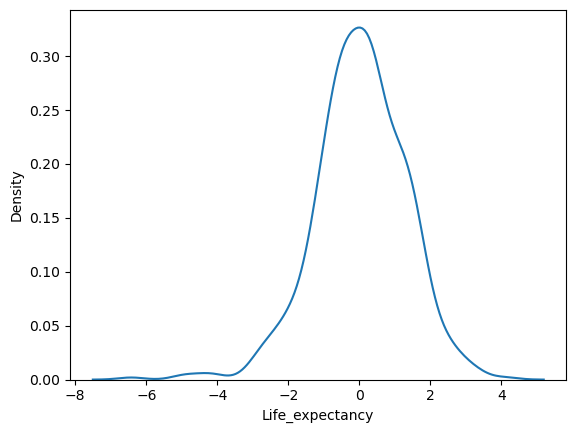

In [42]:
# Here, we will check whether the residuals are normally distributed.
# This will be done by using the KDE plot to visualise the distribution of residuals.

sns.kdeplot(x = residual)
plt.show()

*The KDE plot indicates that the residual distribution is approximately symmetric.*

*Though it has a sharper peak and a heavier tail than a normal distribution.*

*But the second condition has not been met.*

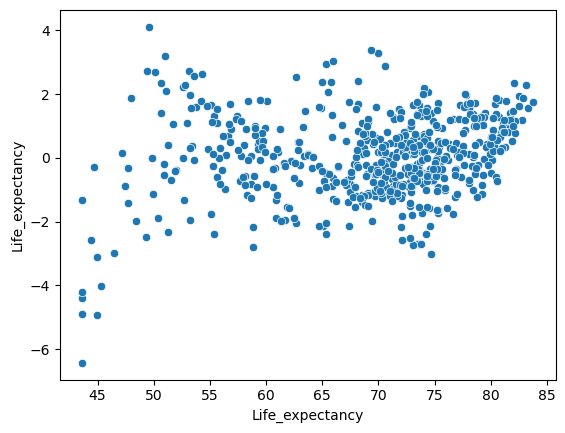

In [43]:
# In this condition, we will be checking for homoscedasticity.
# We will plot a scatterplot of the predicted values and the residuals.
# This help to verify that the residuals have consistent variance across predictions.

sns.scatterplot(x = y_test,y = residual)
plt.show()

**Running K-Fold Cross Validation**  
To ensure that the model is not just coincedentally good at just one test-slice. We're going to check its perfomrance on all parts of the data by randomly splitting the test and train data 5 times and training 5 different iterations of the linear regression model.

In [ ]:
from sklearn.model_selection import cross_val_score

#Creating a reusable cross validation function for scoring and visualising
def cross_validate(estimator, x, y, k = 5, plot_title = "Cross Validation Score", plot_ylim_top = None, plot_ylim_bottom = None):
    cv_score = cross_val_score(estimator, x, y, cv = k, n_jobs = -1) #this will use the default scoring method of the model (which is r2 score)
    print(f"Cross-Validation Score: {cv_score}")
    print(f"Mean Cross-Validation Score: {np.mean(cv_score)}")
    #plotting a bar graph to visualise and compare the scores of each cross validation iteration
    plt.bar(np.arange(1, k+1), cv_score)
    plt.xticks(np.arange(1, k+1))
    plt.xlabel("Iteration (k)")
    plt.ylabel("R-Square Score")
    plt.ylim(top= plot_ylim_top, bottom=plot_ylim_bottom)
    plt.title(plot_title)
    plt.show()


Cross-Validation Score: [0.98271853 0.98161229 0.98265397 0.98367331 0.98141168]
Mean Cross-Validation Score: 0.9824139542287854


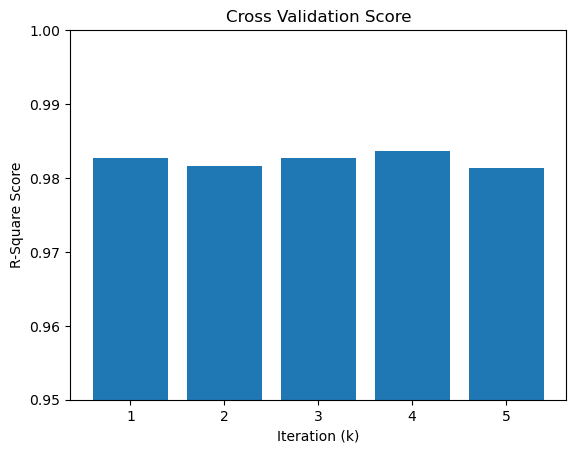

In [45]:

cross_val_reg_model = LinearRegression()
cross_validate(cross_val_reg_model, x_scaled, y, k = 5, plot_ylim_top=1, plot_ylim_bottom=0.95)


From the cross validation assessment, the model maintains a 0.98 r-square score on the first four iterations with dips of 0.001 (+ or -) between iterations but dropped to 0.97 on the last iteration.  
The calculated average r-square score remains 0.98

**Enhancing the Model with Feature Selection**

In [ ]:
#rechecking all the features
x_train.columns

Index(['Country', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America'],
      dtype='object')

In [47]:
from sklearn.feature_selection import RFECV #using the cross validated recursive feature elimination method

lr_model = LinearRegression()
RFE_Selection_Model = RFECV(estimator = lr_model, scoring="neg_mean_squared_error", cv = 5, n_jobs = -1)
RFE_Selection_Model.fit(x_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

Show the selected features that have been found to be most relevant

In [ ]:
most_relevant_features = RFE_Selection_Model.get_feature_names_out()
most_relevant_features

array(['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'BMI', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_Middle East',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype=object)

In [ ]:
print(f"Number of Selected Feature: {len(most_relevant_features)}")
print(f"Total Number of Feature: {len(x_train.columns)}")

Number of Selected Feature: 18
Total Number of Feature: 27


Of the 20 independent variables, 18 are the most relevant to determine the life expectancy age

In [ ]:
eliminated_features = set(x_train.columns).difference(set(most_relevant_features)) #get the eliminated features by finding features that are present in th x features but not present in the seleced features
eliminated_features

{'Country',
 'Diphtheria',
 'Economy_status_Developed',
 'Economy_status_Developing',
 'Hepatitis_B',
 'Measles',
 'Polio',
 'Region_European Union',
 'Region_Rest of Europe'}

Getting the data from the train and test dataset using the best features labels

In [51]:
x_train_best = x_train[most_relevant_features] #index the best features of the training dataframe
x_test_best = x_test[most_relevant_features] #index the best features of the test dataframe
x_train_best.head()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
2026  0.933333       0.058415           0.047237         0.151999   
651   0.266667       0.018195           0.015521         0.159405   
2225  0.933333       0.130237           0.105947         0.230078   
2357  0.666667       0.095763           0.074230         0.077481   
670   0.200000       0.397414           0.486546         1.000000   

      Alcohol_consumption       BMI  Incidents_HIV  GDP_per_capita  \
2026             0.138859  0.271930       0.000000        0.123076   
651              0.760609  0.596491       0.068627        0.483210   
2225             0.374070  0.596491       0.382353        0.552141   
2357             0.276585  0.552632       0.019608        0.119015   
670              0.129791  0.298246       1.000000        0.109331   

      Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
2026        0.369692                     0.974194                  0.946032   
651         0.180738                     0.129032                  0.133333   
2225        0.535072                     0.096774                  0.088889   
2357        0.050542                     0.083871                  0.088889   
670         0.032147                     0.909677                  0.901587   

      Schooling  Region_Asia  Region_Central America and Caribbean  \
2026   0.753846          1.0                                   0.0   
651    0.807692          0.0                                   0.0   
2225   0.684615          0.0                                   0.0   
2357   0.630769          0.0                                   0.0   
670    0.361538          0.0                                   0.0   

      Region_Middle East  Region_North America  Region_Oceania  \
2026                 0.0                   0.0             0.0   
651                  0.0                   0.0             0.0   
2225                 0.0                   0.0             0.0   
2357                 0.0                   0.0             0.0   
670                  0.0                   0.0             0.0   

      Region_South America  
2026                   0.0  
651                    0.0  
2225                   1.0  
2357                   0.0  
670                    0.0

Scoring the Model fitted with the RFE Selected features  

In [52]:
#testing a new model that has been created with the best features
lr_model_bf = LinearRegression()
lr_model_bf.fit(x_train_best, y_train)
y_pred_bf = lr_model_bf.predict(x_test_best)
evaluate(y_test, y_pred_bf)

r2_score         0.980057
MAE              0.984788
MSE              1.643919
RMSE             1.282154
mean_residual    0.043432
dtype: float64

From the evaluation above, linear regression model trained with selected features produced prediction with r-square score of `0.980057`, hence __performs roughly the same__ as the one trained with all the features which produced prediction with r-square score of `0.980073`. It shows that the selected features are the main determinants of the dependent variable.

**Enhancing the Model with `GridSearch` Hyper Parameter Tunning Method**
> While fitting the model with all features since feature selection produced negligible difference

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Defining the hyper parameters
params = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False],
    'tol': [1e-06]
}

In [55]:
untuned_model = LinearRegression()
tuned_model = GridSearchCV(estimator = untuned_model, param_grid = params, cv = 5, n_jobs = -1, verbose = 1) #perform hyperparmeter tunning
tuned_model.fit(x_train, y_train)#fit the model with all the features

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False], 'tol': [1e-06]},
             verbose=1)

In [ ]:
tuned_model.best_params_ #display the best hyper parameters

{'copy_X': True, 'fit_intercept': True, 'positive': False, 'tol': 1e-06}

In [ ]:
#Testing the model with best parameters
y_pred_frm_tunning = tuned_model.predict(x_test)
evaluate(y_test, y_pred_frm_tunning)

r2_score         0.980073
MAE              0.981703
MSE              1.642596
RMSE             1.281638
mean_residual    0.038005
dtype: float64

__Linear Regression Conclusion__: The evaluation result having negligible difference after Hyper-Parameter tunning suggest that the model is at its best and cannot be pushed further for this life expectancy prediction problem.

### Model 2: Random Forest Regressor.  
>1) This model will be used as an alternative to the Linear Regression for predicting Life expectancy.  
>2) First, we will import Random Forest Regressor.  
>3) This model builds an ensemble of decision tress for regression tasks.  
>4) Which regularly improves the accuracy of predictions and reduces overfitting.  

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Here, we will create an instance of the random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train) #fitting the moel with the training data
rfr_y_pred = rfr.predict(x_test) #test model by making prediction

In [59]:
# applying our evaluation metrics to the random forest regressor algorithm to analyse its performance
evaluate(y_test,rfr_y_pred)

r2_score         0.997215
MAE              0.348124
MSE              0.229526
RMSE             0.479088
mean_residual    0.062105
dtype: float64

**Evaluation with K-Fold Cross Validation**

Cross-Validation Score: [0.99673982 0.99603486 0.99699143 0.99634386 0.99624377]
Mean Cross-Validation Score: 0.9964707479578536


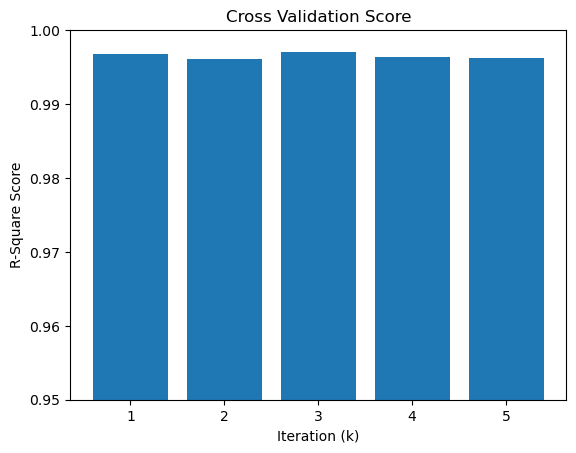

In [60]:
rfr_cross_val_model = RandomForestRegressor()
cross_validate(rfr_cross_val_model, x_scaled, y, k = 5, plot_ylim_top=1, plot_ylim_bottom=0.95)

The regression model maitained an average r-square score of 0.996 during the 5-fold cross validation showing a good fit

**Finding the Best Features with "Feature Selection"**

In [61]:
from sklearn.feature_selection import RFECV

new_rfr_model = RandomForestRegressor()

rfr_RFECV = RFECV(estimator = new_rfr_model, cv = 3, n_jobs = -1)
rfr_RFECV.fit(x_train, y_train)

RFECV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1)

In [62]:
rfr_most_relevant_features = RFE_Selection_Model.get_feature_names_out()

print("Best Features")
rfr_most_relevant_features

Best Features


array(['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'BMI', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_Middle East',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype=object)

In [63]:
eliminated_features_rfr = set(x_train.columns).difference(set(rfr_most_relevant_features))
print("Eliminated Features")
eliminated_features_rfr

Eliminated Features


{'Country',
 'Diphtheria',
 'Economy_status_Developed',
 'Economy_status_Developing',
 'Hepatitis_B',
 'Measles',
 'Polio',
 'Region_European Union',
 'Region_Rest of Europe'}

Testing a new Random Forest Regressor with the selected features

In [64]:
x_train_best_rfr = x_train[rfr_most_relevant_features] #get the dataframe of the best features by indexing the main x_train dataframe
x_test_best_rfr = x_test[rfr_most_relevant_features] #get the dataframe of the best features by indexing the main x_test dataframe

rfr_bf = RandomForestRegressor()
rfr_bf.fit(x_train_best_rfr, y_train)
y_pred_rfr_bf = rfr_bf.predict(x_test_best_rfr)

evaluate(y_test, y_pred_rfr_bf)

r2_score         0.997113
MAE              0.343367
MSE              0.237933
RMSE             0.487784
mean_residual    0.060483
dtype: float64

The model fitted with the best features performs almost the same as the one fitted with the full features. It shows that the selected features are the main determinants of the dependent variable.

**Performing Hyper Parameer Tuning on the Random Forest Model**  
Using `GridSearchCV`

In [ ]:
#defining the params
params_rfr = {
    "n_estimators": [50, 100, 150], #the number of estimators in the ensemble (in this case the number of trees in the forest)
    "max_depth": [None, 70], #the max-size of each tree (None => exhaust all leaf nodes possible)
    "max_features": [None, "log2"], #the number of features to consider when looking for the best split (None => all features)
    "min_samples_split": [2, 4, 8], #min number of samples required to split a node
    "min_samples_leaf": [1, 4], #min number of samples in a leaf node
}

In [84]:
np.random.seed(42)
rfr_gs = RandomForestRegressor()
grid_search = GridSearchCV(rfr_gs, param_grid = params_rfr, cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(x_train_best_rfr, y_train) #fit the grid search with the best selected features
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'max_depth': 70,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

The above are the currently chosen best hyper-parameters from the list of parameters to use for the Random Forest

Testing the parameters.

In [85]:
y_pred_rfr_gs = grid_search.predict(x_test_best_rfr)

evaluate(y_test, y_pred_rfr_gs)

r2_score         0.997185
MAE              0.341892
MSE              0.232042
RMSE             0.481707
mean_residual    0.062572
dtype: float64

From the evaluation result above, the tunned model (using 150 estimators) performs slightly better than the original with a negligible difference.

### Model 3: Ridge Regression.  

In [68]:
#importing the class of the algorithm
from sklearn.linear_model import  Ridge

model3 = Ridge()
model3.fit(x_train, y_train)
model3_y_pred = model3.predict(x_test)
evaluate(y_test, model3_y_pred)

r2_score         0.979510
MAE              0.990144
MSE              1.688966
RMSE             1.299602
mean_residual    0.038134
dtype: float64

**Evaluate using 5-fold Cross Validation**

Cross-Validation Score: [0.98251575 0.98137647 0.98249273 0.98359518 0.98126781]
Mean Cross-Validation Score: 0.9822495885578771


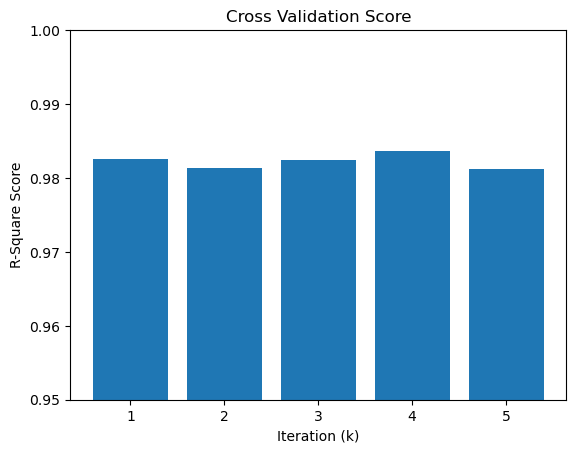

In [69]:
model3_cv = Ridge()
cross_validate(model3_cv, x = x_scaled, y = y, k = 5, plot_ylim_bottom=0.95, plot_ylim_top=1)

Cross validation show the model performing better than the first run

**Trying Model Enhancement using Feature Selection**

In [70]:
model3_RFE = Ridge()
rfe = RFECV(estimator = model3_RFE, cv = 5, n_jobs = -1)
rfe.fit(x_train, y_train)
best_features_model3 = rfe.get_feature_names_out() #get the selected best feature names

In [ ]:
best_features_model3

array(['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'BMI', 'Polio', 'Diphtheria',
       'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Schooling', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_Middle East',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype=object)

In [72]:
#show the eliminated features
eliminated_features_model3 = set(x_train.columns).difference(set(best_features_model3))
print("Eliminated Features")
eliminated_features_model3

Eliminated Features


{'Country',
 'Economy_status_Developed',
 'Economy_status_Developing',
 'Measles',
 'Region_European Union',
 'Region_Rest of Europe',
 'Thinness_five_nine_years'}

In [ ]:
x_train_best_model3 = x_train[best_features_model3] #get the full data for the selected features labels
x_test_best_model3 = x_test[best_features_model3] #get the full data for the selected features labels

Testing a new model with the selected features

In [74]:
model3_bf = Ridge()
model3_bf.fit(x_train_best_model3, y_train)
y_pred_model3_bf = model3_bf.predict(x_test_best_model3)
evaluate(y_test, y_pred_model3_bf)

r2_score         0.979521
MAE              0.989689
MSE              1.688044
RMSE             1.299248
mean_residual    0.038590
dtype: float64

With feture elimination there were no significant impact to the model's performance as the r-square score is `0.979521` which is very similar to the r-square score of the baseline model (r-square score: `0.979510`). It shows that the selected features are the main determinants of the dependent variable.

**Performing Hyper-Parameter Tunning on the Model**
> Using `GridSearchCV` for a possible performance improcement

In [ ]:
#defining the params
params_model3 = {
    "alpha": [0.001, 0.01, 0.1, 1, 10], #Higher alpha values apply greater penalty, forcing coefficient values closer to zero, which lowers variance at the expense of increased bias
    "solver": ['auto', 'svd', 'cholesky', 'lsqr'], #the solver helps optmise speed and the accuracy of the model
    "fit_intercept": [True, False], #to choose whether to calculate the intercept or not
}

In [76]:
model3_gs = Ridge()
grid_search_model3 = GridSearchCV(model3_gs, param_grid = params_model3, cv = 5, n_jobs = -1, verbose = 1)
grid_search_model3.fit(x_train_best_model3, y_train) #fit the grid search with the best selected features
grid_search_model3.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'alpha': 0.1, 'fit_intercept': True, 'solver': 'lsqr'}

The parameters above are the concluded best parameters for this model

Testing the model

In [ ]:
y_pred_model3_gs = grid_search_model3.predict(x_test_best_model3)

evaluate(y_test, y_pred_model3_gs)

r2_score         0.980010
MAE              0.982780
MSE              1.647792
RMSE             1.283663
mean_residual    0.038516
dtype: float64

Based on the evaluation result above, the tunned model performs slightly better (r-square score: 0.98001) than the original (r-square score: 0.97951) with a difference of 0.0005.

### Comparing the Three Models

Creating a reusable function for handling the comparison

In [104]:
def compare_model_results(models_score_dict, color, plot_title, ylim_bottom = None, ylim_top = None, y_label = "Score", x_label = "Model Names"):
    print(models_score_dict)
    plt.figure(figsize=(9, 6))
    plt.bar(models_score_dict.keys(), models_score_dict.values(), color = color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if(ylim_bottom != None or ylim_top != None):
        plt.ylim(bottom = ylim_bottom, top = ylim_top)
    plt.title(plot_title)
    plt.show()

Comparing __R-Square__ Scores _(higher is better)_

{'Multilinear Regression': 0.9800726620272822, 'Random Forest Regressor': 0.9971849581305574, 'Ridge Regression': 0.9800096266172226}


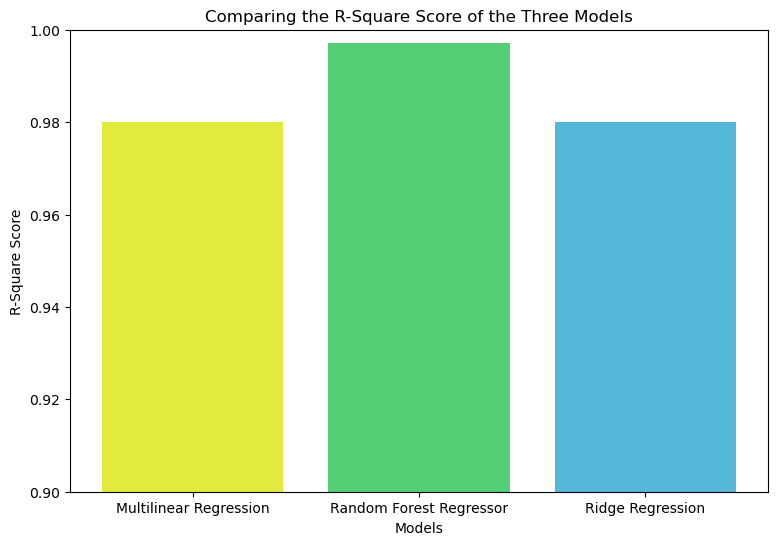

In [105]:
r2_comparison = {
    "Multilinear Regression": r2_score(y_test, y_pred_frm_tunning),
    "Random Forest Regressor": r2_score(y_test, y_pred_rfr_gs),
    "Ridge Regression": r2_score(y_test, y_pred_model3_gs)

}

#plot the visual to compare them
compare_model_results(r2_comparison, 
                      color = ["#e2eb3d", "#55cf75", "#55b8d9"], 
                      plot_title = "Comparing the R-Square Score of the Three Models", 
                      x_label = "Models", 
                      y_label = "R-Square Score",
                      ylim_bottom = 0.9,
                      ylim_top = 1)

Based on the comparism of the r-square sores of each model enginnered for this problem, the random forest regressor model peformes better among the three achieving an r-square score greater than 0.99.

Comparing the __Root Mean Squared Error (RMSE)__ values _(Lower is Better)_

{'Multilinear Regression': 1.2816379634442978, 'Random Forest Regressor': 0.4817072127961156, 'Ridge Regression': 1.283663441876416}


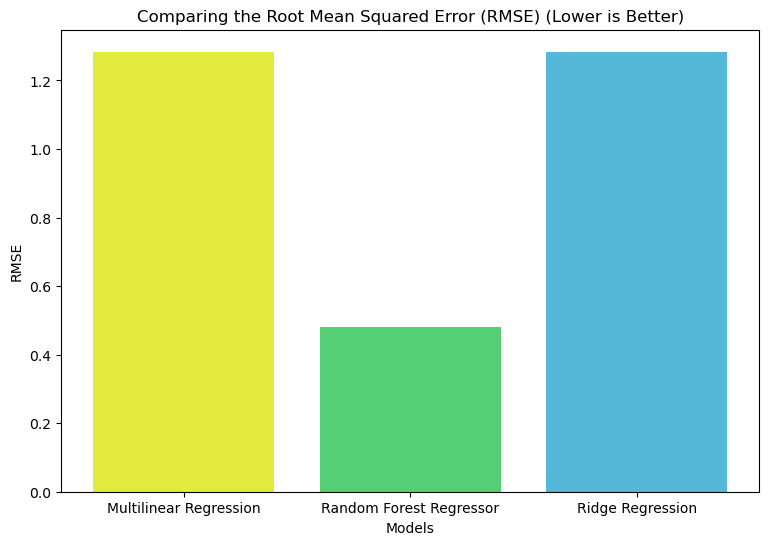

In [106]:
RMSE_comparison = {
    "Multilinear Regression": root_mean_squared_error(y_test, y_pred_frm_tunning),
    "Random Forest Regressor": root_mean_squared_error(y_test, y_pred_rfr_gs),
    "Ridge Regression": root_mean_squared_error(y_test, y_pred_model3_gs)
}

compare_model_results(RMSE_comparison, 
                      color = ["#e2eb3d", "#55cf75", "#55b8d9"], 
                      plot_title = "Comparing the Root Mean Squared Error (RMSE) (Lower is Better)", 
                      x_label = "Models", 
                      y_label = "RMSE")

The Random Forest Regressor is able to prodict life expetancy age more accurately (with an RMSE of 0.48 years) than the linear regression and the Ridge Regression models which has an RMSE of 1.28 years.